Description This Code

- Sclaer : MinMax()

- Feature_Selection : Drop Transfer_day

- XGB

(Optuna Tuning 
Best Trial: score 0.8292545137031471,<-m_F1
params {'max_depth': 10, 'learning_rate': 0.23720667234749193, 'n_estimators': 1100}

- LGB

hand-crafted paramter tuning
{'n_estimators':2000,'learning_rate':0.01, 'max_depth':13, 'n_jobs':-1,                 'boost_from_average':False}

- TH :0.21034

-> 0.58709 (pub : 11)


#라이브러리 불러오기

In [1]:
# 최적 파라미터를 범위내에서 찾아주는 라이브러리로써 캐글에서 인기 폭발이라고 한다.
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 4.0 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 209 kB 82.8 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 147 kB 69.5 MB/s 
     |████████████████████████████████| 112 kB 74.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=e976a52856ac0bcbd3815753933f6da187912afec26fcd66563c461e6b616a0f
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [2]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install anaconda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for anaconda: filename=anaconda-0.0.1.1-py3-none-any.whl size=1124 sha256=7823ca5a8fbac2090159e3ebb53485a0e26674b52d4de24b41294373081c7fe6
  Stored in directory: /root/.cache/pip/wheels/70/29/df/a691ce9377d2b9b8ad2659144a1c4c51c216f2d8037b72dbc2
Successfully built anaconda


In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 97.2 MB/s 


In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


- profiling_tool

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import gc

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'
#한글폰트

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')
#구글드라이브연동

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#한글폰트 설치. 런타임재사용 필요

In [5]:
train=pd.read_csv('/content/drive/MyDrive/DACON_Dataset/Hyundai_oil/train.csv')


In [6]:
test=pd.read_csv('/content/drive/MyDrive/DACON_Dataset/Hyundai_oil/test.csv')

# dataframe 사이즈 줄이기.

In [7]:
int64_col=list(train.columns[train.dtypes=='int64'])
float64_col=list(train.columns[train.dtypes=='float64'])

In [8]:
# train_data size 줄이기.
for i in int64_col :
  train[i]=train[i].astype('int32')
  #test[i]=test[i].astype('int32')

for i in float64_col :
  train[i]=train[i].astype('float32')
  #test[i]=test[i].astype('float32')

In [9]:
int64_col=list(test.columns[test.dtypes=='int64'])
float64_col=list(test.columns[test.dtypes=='float64'])

In [10]:
# test_data size 줄이기.
for i in int64_col :
  #train[i]=train[i].astype('int32')
  test[i]=test[i].astype('int32')

for i in float64_col :
  #train[i]=train[i].astype('float32')
  test[i]=test[i].astype('float32')

# 문자열 간단히 라벨링.

In [11]:
cate_val = ['COMPONENT_ARBITRARY']
for i in cate_val :
  enc = LabelEncoder()
  enc=enc.fit(train[i])
  train[i]=enc.transform(train[i])
  for label in np.unique(test[i]):
        if label not in enc.classes_: 
            enc.classes_ = np.append(enc.classes_, label)
  test[i]=enc.transform(test[i]) # data leakage 주의

In [ ]:
train.COMPONENT_ARBITRARY.unique()

array(['COMPONENT3', 'COMPONENT2', 'COMPONENT1', 'COMPONENT4'],
      dtype=object)

#NAN 확인 (test셋에는 결측치가 없다.)

In [ ]:
train.isnull().sum()

#EDA

In [ ]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

- 컴포넌트별로 분포를 띄어보자.

In [ ]:
train.COMPONENT_ARBITRARY.unique()

array([2, 1, 0, 3])

In [12]:
comp0 = train[train['COMPONENT_ARBITRARY']==0]
comp1 = train[train['COMPONENT_ARBITRARY']==1]
comp2 = train[train['COMPONENT_ARBITRARY']==2]
comp3 = train[train['COMPONENT_ARBITRARY']==3]

print(comp0.shape, comp1.shape, comp2.shape,comp3.shape)

(3890, 54) (2316, 54) (7050, 54) (839, 54)


Text(0.5, 1.0, 'ANONYMOUS_1')

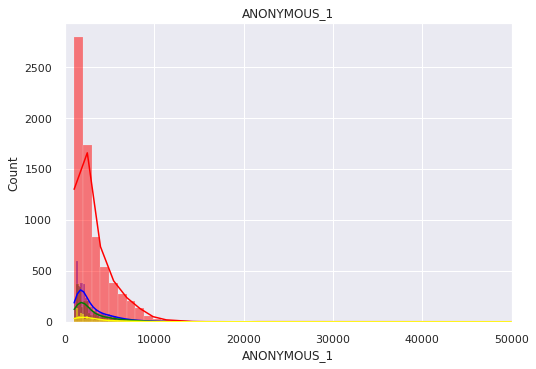

In [ ]:
fig, ax = plt.subplots()
sns.histplot(comp0.ANONYMOUS_1, ax=ax,kde=True,color='blue',bins=300) 
sns.histplot(comp1.ANONYMOUS_1, ax=ax,kde=True,color='green',bins=300)
sns.histplot(comp2.ANONYMOUS_1, ax=ax,kde=True,color='red',bins=300)
sns.histplot(comp3.ANONYMOUS_1, ax=ax,kde=True,color='yellow',bins=300)
ax.set_xlim(0,50000)
ax.set_title('ANONYMOUS_1')

Text(0.5, 1.0, 'ANONYMOUS_2')

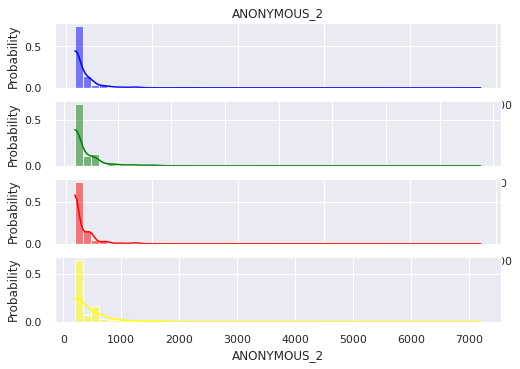

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.ANONYMOUS_2, ax=ax[0],kde=True,color='blue',bins=50,stat='probability') 
sns.histplot(comp1.ANONYMOUS_2, ax=ax[1],kde=True,color='green',bins=50,stat='probability')
sns.histplot(comp2.ANONYMOUS_2, ax=ax[2],kde=True,color='red',bins=50,stat='probability')
sns.histplot(comp3.ANONYMOUS_2, ax=ax[3],kde=True,color='yellow',bins=50,stat='probability')

ax[0].set_title('ANONYMOUS_2')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

Text(0.5, 1.0, 'AG')

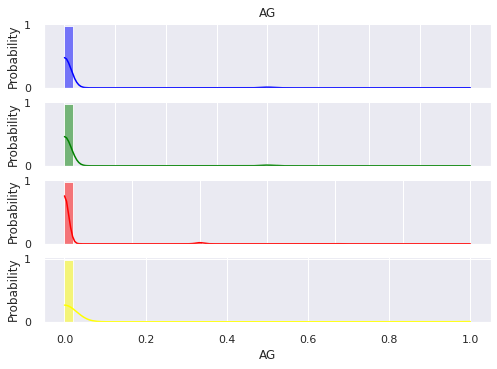

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.AG, ax=ax[0],kde=True,color='blue',bins=50,stat='probability') 
sns.histplot(comp1.AG, ax=ax[1],kde=True,color='green',bins=50,stat='probability')
sns.histplot(comp2.AG, ax=ax[2],kde=True,color='red',bins=50,stat='probability')
sns.histplot(comp3.AG, ax=ax[3],kde=True,color='yellow',bins=50,stat='probability')

ax[0].set_title('AG')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

Text(0.5, 1.0, 'CO')

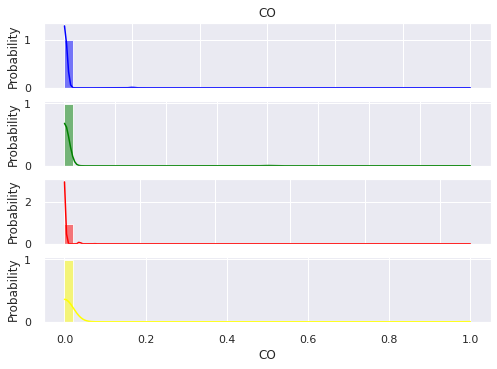

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.CO, ax=ax[0],kde=True,color='blue',bins=50,stat='probability') 
sns.histplot(comp1.CO, ax=ax[1],kde=True,color='green',bins=50,stat='probability')
sns.histplot(comp2.CO, ax=ax[2],kde=True,color='red',bins=50,stat='probability')
sns.histplot(comp3.CO, ax=ax[3],kde=True,color='yellow',bins=50,stat='probability')

ax[0].set_title('CO')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

Text(0.5, 1.0, 'CR')

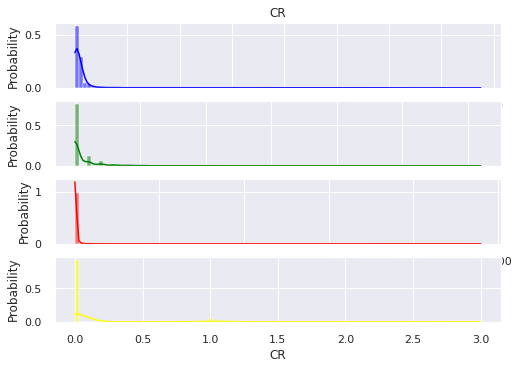

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.CR, ax=ax[0],kde=True,color='blue',bins=100,stat='probability') 
sns.histplot(comp1.CR, ax=ax[1],kde=True,color='green',bins=100,stat='probability')
sns.histplot(comp2.CR, ax=ax[2],kde=True,color='red',bins=100,stat='probability')
sns.histplot(comp3.CR, ax=ax[3],kde=True,color='yellow',bins=100,stat='probability')

ax[0].set_title('CR')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

In [ ]:
comp3.CR.value_counts()



0    777
1     51
2      7
3      4
Name: CR, dtype: int64

Text(0.5, 1.0, 'CU')

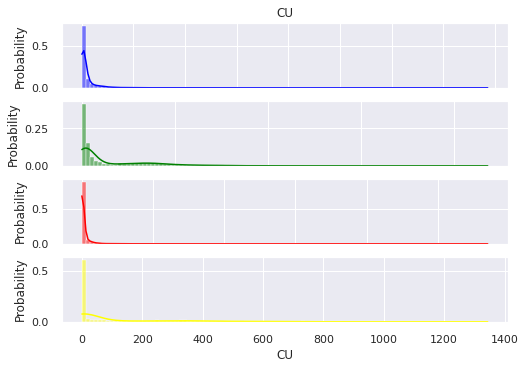

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.CU, ax=ax[0],kde=True,color='blue',bins=100,stat='probability') 
sns.histplot(comp1.CU, ax=ax[1],kde=True,color='green',bins=100,stat='probability')
sns.histplot(comp2.CU, ax=ax[2],kde=True,color='red',bins=100,stat='probability')
sns.histplot(comp3.CU, ax=ax[3],kde=True,color='yellow',bins=100,stat='probability')

ax[0].set_title('CU')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()


Text(0.5, 1.0, 'FOXID')

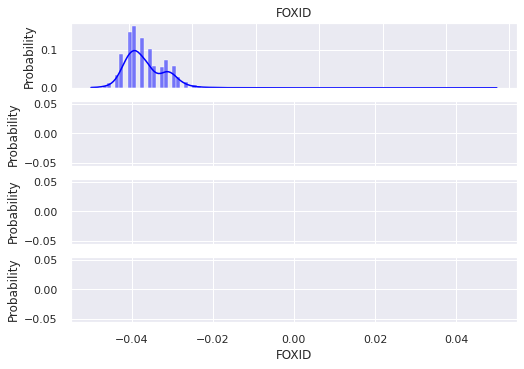

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.FOXID, ax=ax[0],kde=True,color='blue',bins=100,stat='probability') 
sns.histplot(comp1.FOXID, ax=ax[1],kde=True,color='green',bins=100,stat='probability')
sns.histplot(comp2.FOXID, ax=ax[2],kde=True,color='red',bins=100,stat='probability')
sns.histplot(comp3.FOXID, ax=ax[3],kde=True,color='yellow',bins=100,stat='probability')

ax[0].set_title('FOXID')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()


Text(0.5, 1.0, 'U100')

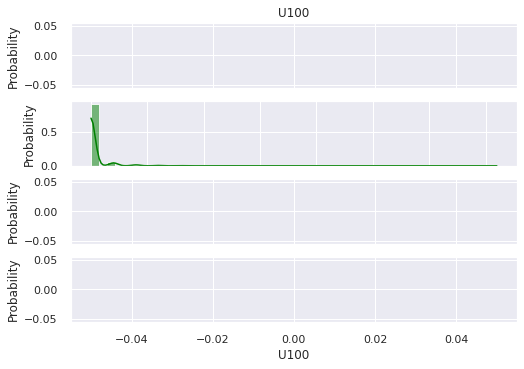

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.U100, ax=ax[0],kde=True,color='blue',bins=50,stat='probability') 
sns.histplot(comp1.U100, ax=ax[1],kde=True,color='green',bins=50,stat='probability')
sns.histplot(comp2.U100, ax=ax[2],kde=True,color='red',bins=50,stat='probability')
sns.histplot(comp3.U100, ax=ax[3],kde=True,color='yellow',bins=50,stat='probability')

ax[0].set_title('U100')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()
/usr/local/lib/python3.7/dist-packages/seaborn/_statistics.py:369: RuntimeWarning: invalid value encountered in true_divide
  hist = hist.astype(float) / hist.sum()


Text(0.5, 1.0, 'U14')

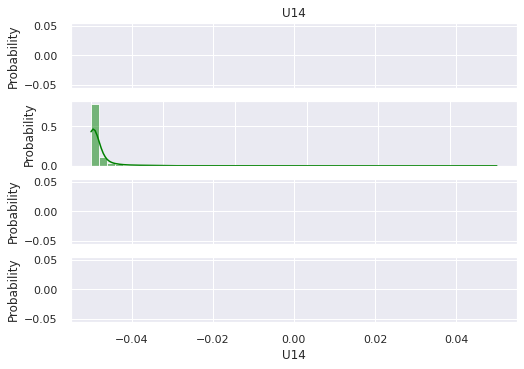

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.U14, ax=ax[0],kde=True,color='blue',bins=50,stat='probability') 
sns.histplot(comp1.U14, ax=ax[1],kde=True,color='green',bins=50,stat='probability')
sns.histplot(comp2.U14, ax=ax[2],kde=True,color='red',bins=50,stat='probability')
sns.histplot(comp3.U14, ax=ax[3],kde=True,color='yellow',bins=50,stat='probability')

ax[0].set_title('U14')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

In [ ]:
comp3.CD.isnull().sum()

79

Text(0.5, 1.0, 'CD')

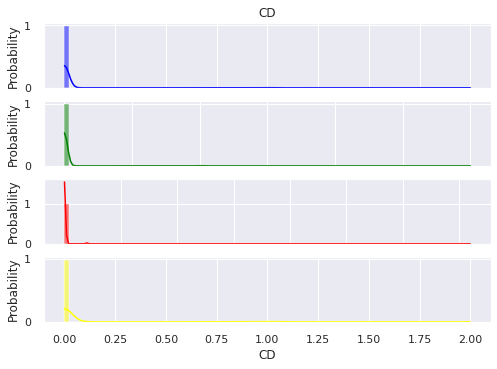

<Figure size 4320x1440 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(60,20))
sns.histplot(comp0.CD, ax=ax[0],kde=True,color='blue',bins=100,stat='probability') 
sns.histplot(comp1.CD, ax=ax[1],kde=True,color='green',bins=100,stat='probability')
sns.histplot(comp2.CD, ax=ax[2],kde=True,color='red',bins=100,stat='probability')
sns.histplot(comp3.CD, ax=ax[3],kde=True,color='yellow',bins=100,stat='probability')

ax[0].set_title('CD')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

Text(0.5, 1.0, 'V40')

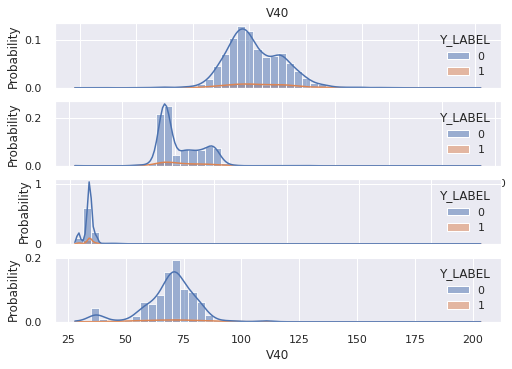

<Figure size 7200x2880 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(4,1)
plt.figure(figsize=(100,40))
sns.histplot(data=comp0,x='V40', ax=ax[0],kde=True,hue='Y_LABEL',bins=50,stat='probability')
sns.histplot(data=comp1,x='V40', ax=ax[1],kde=True,hue='Y_LABEL',bins=50,stat='probability')
sns.histplot(data=comp2,x='V40', ax=ax[2],kde=True,hue='Y_LABEL',bins=50,stat='probability')
sns.histplot(data=comp3,x='V40', ax=ax[3],kde=True,hue='Y_LABEL',bins=50,stat='probability')

ax[0].set_title('V40')
#ax.set_xlim(0,10000)
#ax.set_title('ANONYMOUS_2')

각 컴포넌트별 사이즈 :

0(3890, 54) 1(2316, 54) 2(7050, 54) 3(839, 54)


FH2O                   10205-> 10205는 0번을 제외한 모든 컴포넌트

FNOX                   10205


FOPTIMETHGLY           10205


FOXID                  10205
FSO4                   10205


FTBN                   10205


FUEL                   10205

SOOTPERCENTAGE         10205


-> component 0을 제외한 나머지 component는 수집되지 않거나, 측정할 수 없는 지표로 추정.

0(3890, 54) 1(2316, 54) 2(7050, 54) 3(839, 54)


U100                   11779->1번 컴포넌트를 제외한 모든 컴포넌트


U75                    11779


U50                    11779


U25                    11779


U20                    11779


->11977은 컴포넌트 1에서의 결측값이다.
U14                    11977->(198개는 컴포넌트1안에서의 결측값이다.)


U6                     11977


U4                     11977



컴포넌트 0을 제외한 모든 컴포넌트가 결측이며, + 컴포넌트0에도 결측치가 미세하게 존재한다.

V100                   10371


그 외 모든 결측열 ( K, CD)는 모든 컴포넌트에 골고루 존재함.

In [ ]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [ ]:
train['FH2O'].unique()

array([ nan,   9.,  12.,  14.,  15.,  13.,  17.,  16.,  10.,  18.,  23.,
        11.,  19.,   8.,  24., 170.,  25.,  31., 188., 169.,  20.,  26.,
         7.,  33.,  41.,  27.,  21.,  22.,  77.,  43.,   6., 279.,  28.,
       182.,  32., 102.,  30.,  38.,  34., 120.,  76.,  86.,  42.,  35.,
        51.,  36., 252., 219., 262.,  45., 180., 213., 238., 288.,  29.,
        91., 239.,  39., 114.,  49.,  72.,  58., 209., 287.,  37.,  84.,
        50., 242., 309.,  61., 154., 320., 289.], dtype=float32)

- 전체데이터셋에대한 eda

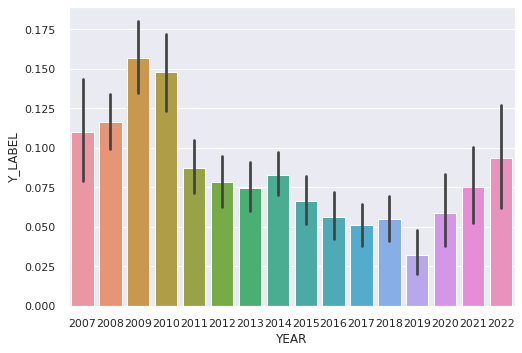

In [ ]:
sns.barplot(train.YEAR,train.Y_LABEL)

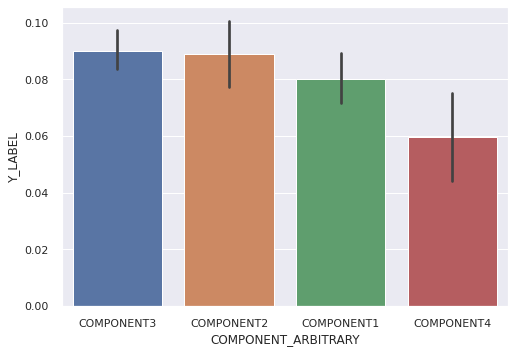

In [ ]:
sns.barplot(train.COMPONENT_ARBITRARY,train.Y_LABEL)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:446: MatplotlibDeprecationWarning: The 'manage_xticks' parameter of boxplot() has been renamed 'manage_ticks' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  **kws)


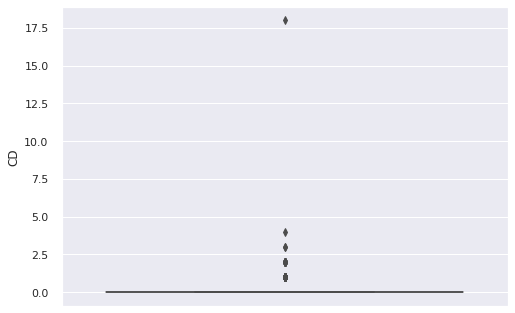

In [ ]:
sns.boxplot(y=train.CD,manage_xticks=False)

In [ ]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

Text(0.5, 1.0, 'ANONYMOUS_1')

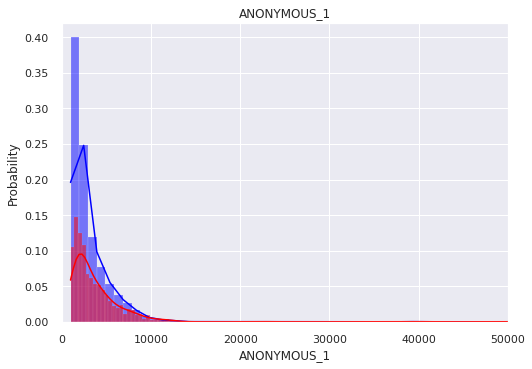

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.ANONYMOUS_1, ax=ax,kde=True,color='blue',bins=300,stat='probability')  # distplot is deprecate and replaced by histplot
sns.histplot(train[train.Y_LABEL==1]['ANONYMOUS_1'],color='red', ax=ax,kde=True,bins=150,stat='probability')
ax.set_xlim(0,50000)
ax.set_title('ANONYMOUS_1')
#ax.set_xticks(range(1,32))

Text(0.5, 1.0, 'ANONYMOUS_2')

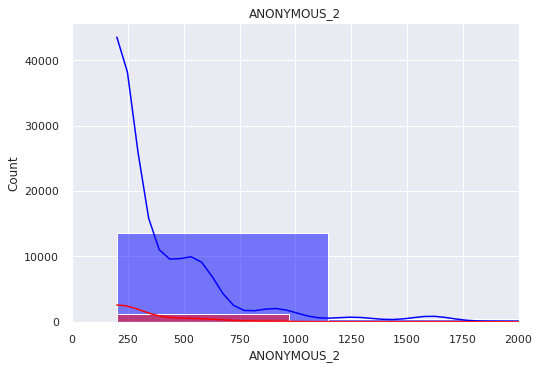

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.ANONYMOUS_2, ax=ax,kde=True,color='blue',bins=10)  # distplot is deprecate and replaced by histplot
sns.histplot(train[train.Y_LABEL==1]['ANONYMOUS_2'],color='red', ax=ax,kde=True,bins=10)
ax.set_xlim(0,2000)
#ax.set_ylim(0,0.2)

ax.set_title('ANONYMOUS_2')
#ax.set_xticks(range(1,32))

- 비슷한 분포를 보이는 것으로 보아 별의미 없는 컬럼.

Text(0.5, 1.0, 'SAMPLE_TRANSFER_DAY')

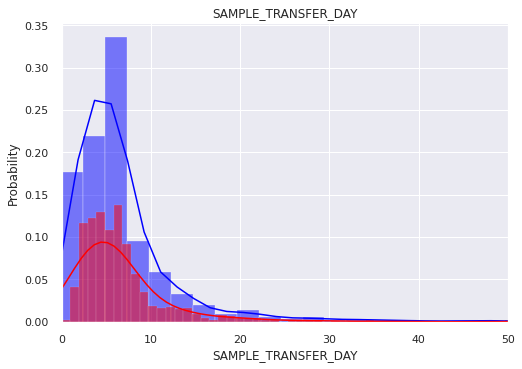

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.SAMPLE_TRANSFER_DAY,color='blue', ax=ax,kde=True,bins=150,stat='probability')
sns.histplot(train[train.Y_LABEL==1]['SAMPLE_TRANSFER_DAY'],color='red', ax=ax,kde=True,bins=150,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,50)
ax.set_title('SAMPLE_TRANSFER_DAY')

Text(0.5, 1.0, 'FH2O')

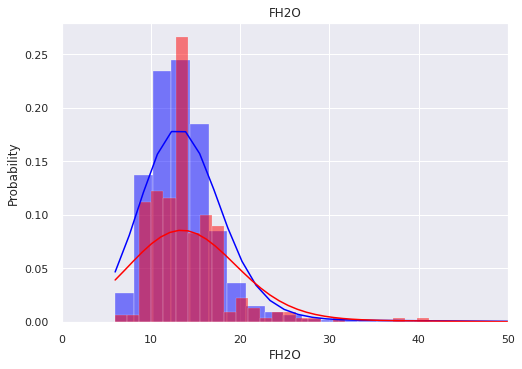

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.FH2O,color='blue', ax=ax,kde=True,bins=150,stat='probability')
sns.histplot(train[train.Y_LABEL==1]['FH2O'],color='red', ax=ax,kde=True,bins=150,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,50)
ax.set_title('FH2O')

Text(0.5, 1.0, 'FNOX')

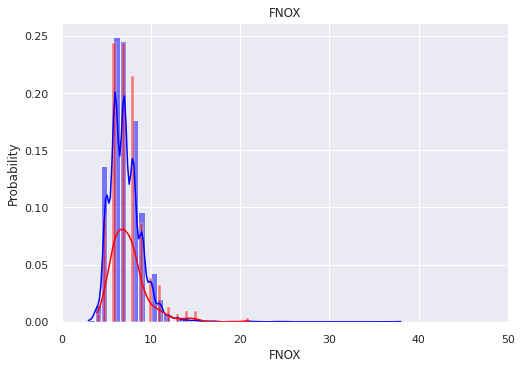

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.FNOX,color='blue', ax=ax,kde=True,bins=50,stat='probability')
sns.histplot(train[train.Y_LABEL==1]['FNOX'],color='red', ax=ax,kde=True,bins=50,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,50)
ax.set_title('FNOX')

- 최근에 점검했을수록 불량률 떨어진다.

Text(0.5, 1.0, 'YEAR')

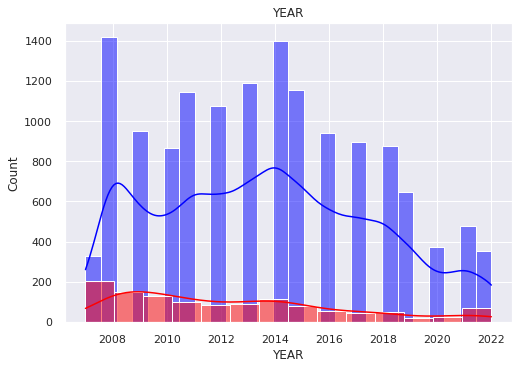

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.YEAR, ax=ax,color='blue',kde=True)  
sns.histplot(train[train.Y_LABEL==1]['YEAR'],color='red', ax=ax,kde=True)  
# distplot is deprecate and replaced by histplot

ax.set_title('YEAR')

- CD는 수치가 낮으면 불량일 가능성 존재.

Text(0.5, 1.0, 'CD')

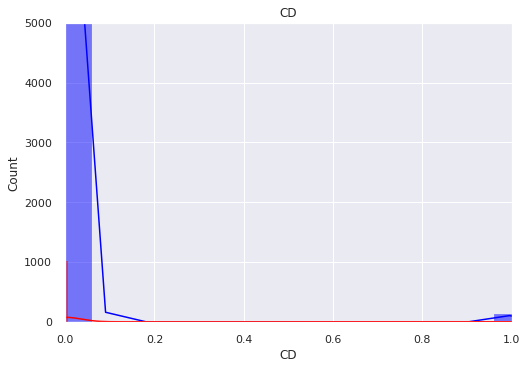

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.CD, ax=ax,color='blue',kde=True,bins=300)  
sns.histplot(train[train.Y_LABEL==1]['CD'],color='red', ax=ax,kde=True,bins=300)  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,1.0)
ax.set_ylim(0,5000)

ax.set_title('CD')

- AL은 별로 중요한 특성 x

Text(0.5, 1.0, 'AL')

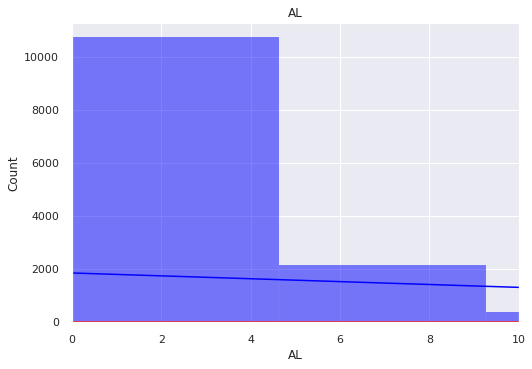

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train.AL, ax=ax,color='blue',kde=True,bins=1000)  
sns.histplot(train[train.Y_LABEL==1]['AL'],color='red', ax=ax,kde=True,bins=1000,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,10)
#ax.set_ylim(0,5000)

ax.set_title('AL')

Text(0.5, 1.0, 'H2O')

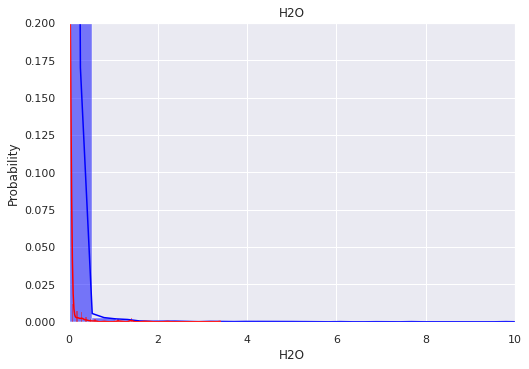

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train['H2O'], ax=ax,color='blue',kde=True,bins=100,stat='probability')  
sns.histplot(train[train.Y_LABEL==1]['H2O'],color='red', ax=ax,kde=True,bins=100,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,10)
ax.set_ylim(0,0.2)

ax.set_title('H2O')

Text(0.5, 1.0, 'CR')

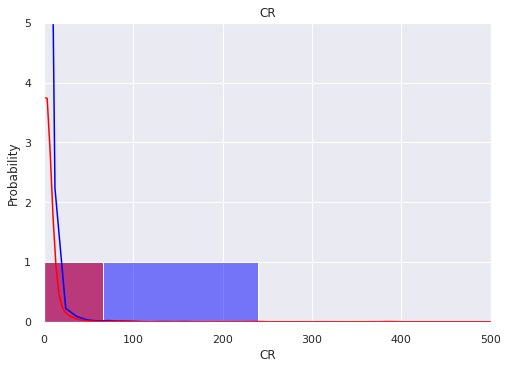

In [ ]:
fig, ax = plt.subplots()
sns.histplot(temp['CR'], ax=ax,color='blue',kde=True,bins=10,stat='probability')  
sns.histplot(temp[temp.Y_LABEL==1]['CR'],color='red', ax=ax,kde=True,bins=10,stat='probability')  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,500)
ax.set_ylim(0,5.0)

ax.set_title('CR')

Text(0.5, 1.0, 'AG')

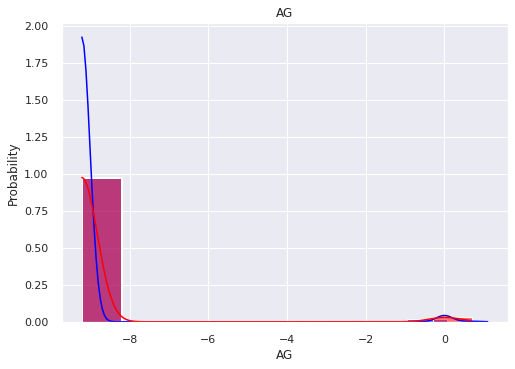

In [ ]:
fig, ax = plt.subplots()
sns.histplot(np.log(temp['AG']+0.0001), ax=ax,color='blue',kde=True,bins=10,stat='probability')  
sns.histplot(np.log(temp[temp.Y_LABEL==1]['AG']+0.0001),color='red', ax=ax,kde=True,bins=10,stat='probability')  
# distplot is deprecate and replaced by histplot
#ax.set_xlim(0,500)
#ax.set_ylim(0,5.0)

ax.set_title('AG')

In [ ]:
train[train.Y_LABEL==1]['AG'].value_counts()

0.0    1165
1.0      35
2.0       3
Name: AG, dtype: int64

In [ ]:
train[train.Y_LABEL==0]['AG'].value_counts()

0.0    12596
1.0      270
2.0       25
3.0        1
Name: AG, dtype: int64

In [ ]:
skew(np.log(train.AG))


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


nan

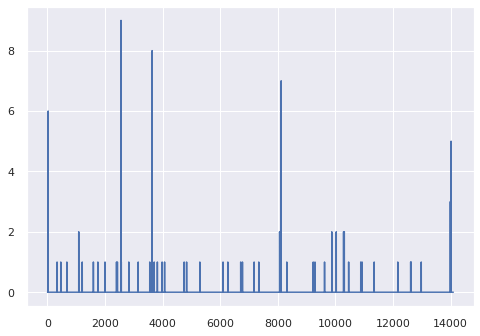

In [ ]:
train.BE.plot()

- 컬럼별 왜도확인

In [ ]:
int32_col=list(train.columns[train.dtypes=='int32'])
float32_col=list(train.columns[train.dtypes=='float32'])

In [ ]:
num_val=int32_col +float32_col

In [ ]:
tmp = ['YEAR','Y_LABEL']
num_val = [x for x in num_val if x not in tmp]

In [ ]:
test_num_col=list(test.columns[(test.columns !='YEAR') & (test.columns !='COMPONENT_ARBITRARY') ])

In [ ]:
from scipy.stats import skew, kurtosis,boxcox

skew_num_val=[]
for i in test_num_col:
  
  print(i," : ",skew((temp[i])))
  if abs(skew(temp[i]))>1:

    skew_num_val.append(i)



KeyError: ignored

- 상관계수 분석 (다중공선성 제거를 위한)

In [ ]:
temp.corr()

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
COMPONENT_ARBITRARY,1.000000,0.020564,-0.001697,-0.012237,-0.000554,-0.000846,-0.000147,0.011580,0.002327,-0.023412,...,0.475500,0.479561,0.472128,0.400858,0.395288,0.041598,0.264481,0.225840,-0.542198,0.002703
ANONYMOUS_1,0.020564,1.000000,0.106546,-0.041395,0.072154,-0.025674,0.017924,0.013467,-0.064204,-0.010805,...,-0.051344,-0.051673,-0.061129,-0.036027,-0.025849,0.001883,-0.008586,0.019542,-0.019991,0.044197
YEAR,-0.001697,0.106546,1.000000,-0.094086,0.138199,-0.129124,-0.017525,0.011145,-0.098589,-0.063859,...,-0.112484,-0.121875,-0.127162,-0.099763,-0.102843,-0.027624,-0.128154,-0.051584,0.048572,-0.087871
SAMPLE_TRANSFER_DAY,-0.012237,-0.041395,-0.094086,1.000000,-0.000060,0.021211,-0.017493,0.004305,0.016909,0.009600,...,0.018661,0.017915,0.022983,0.009256,0.006391,-0.002412,0.034238,0.013896,-0.019428,-0.004315
ANONYMOUS_2,-0.000554,0.072154,0.138199,-0.000060,1.000000,-0.006266,-0.022788,-0.100307,-0.011871,0.011162,...,-0.028730,-0.030987,-0.031611,-0.029365,-0.023334,-0.006469,-0.028586,-0.025339,0.032758,-0.033641
AG,-0.000846,-0.025674,-0.129124,0.021211,-0.006266,1.000000,0.019600,-0.028131,0.031649,0.020884,...,0.010031,0.011888,0.012789,0.013474,0.015122,-0.003853,0.022437,0.013592,0.002631,0.014671
AL,-0.000147,0.017924,-0.017525,-0.017493,-0.022788,0.019600,1.000000,0.000037,0.240863,-0.000858,...,0.012812,0.010518,0.008908,0.002826,0.000512,0.026213,-0.009474,0.013823,-0.024873,0.370512
B,0.011580,0.013467,0.011145,0.004305,-0.100307,-0.028131,0.000037,1.000000,-0.045454,-0.013252,...,-0.007857,-0.001129,-0.004195,0.001813,-0.001354,0.018197,0.038703,-0.000882,-0.006463,-0.029787
BA,0.002327,-0.064204,-0.098589,0.016909,-0.011871,0.031649,0.240863,-0.045454,1.000000,0.029900,...,0.023324,0.023400,0.024763,0.010438,0.013273,0.000480,0.021417,0.004150,-0.009574,0.104840
BE,-0.023412,-0.010805,-0.063859,0.009600,0.011162,0.020884,-0.000858,-0.013252,0.029900,1.000000,...,-0.001038,0.000611,0.000008,-0.000672,0.001315,0.000482,-0.006359,0.001359,0.012394,0.010685


In [ ]:
test.corr()

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
COMPONENT_ARBITRARY,1.000000,0.010591,-0.012645,0.017265,0.006482,0.056090,-0.001423,-0.054719,0.432719,0.080618,0.317968,-0.205108,0.217764,0.543296,0.151991,0.022360,0.298979,-0.492765
ANONYMOUS_1,0.010591,1.000000,0.212530,-0.154059,-0.039422,-0.021711,-0.046871,-0.030009,-0.040602,0.008918,-0.073218,-0.028336,-0.036899,-0.013931,-0.016119,-0.038432,-0.024955,0.003420
YEAR,-0.012645,0.212530,1.000000,0.168950,-0.130456,-0.108328,-0.234413,-0.186774,-0.164040,-0.009610,-0.220784,-0.167643,-0.193206,-0.117655,-0.045596,-0.087415,-0.089380,0.024167
ANONYMOUS_2,0.017265,-0.154059,0.168950,1.000000,0.037371,0.010489,-0.022638,0.029928,-0.009006,0.012345,0.011512,0.002440,0.010206,0.000677,-0.011613,0.015674,-0.023029,0.056394
AG,0.006482,-0.039422,-0.130456,0.037371,1.000000,0.018429,0.048075,0.037226,0.044344,0.010145,0.052496,0.035650,0.051165,0.032442,-0.008661,0.010198,0.034380,0.008332
CO,0.056090,-0.021711,-0.108328,0.010489,0.018429,1.000000,0.119869,0.073523,0.145276,0.087273,0.126478,0.070784,0.185326,0.125546,0.172310,0.339374,0.100381,-0.036903
CR,-0.001423,-0.046871,-0.234413,-0.022638,0.048075,0.119869,1.000000,0.179602,0.587784,0.149911,0.599980,0.185334,0.467292,0.422892,0.350247,0.162860,0.313450,-0.063765
CU,-0.054719,-0.030009,-0.186774,0.029928,0.037226,0.073523,0.179602,1.000000,0.091823,0.070841,0.230079,0.133143,0.251075,-0.032194,0.077908,0.090412,-0.238515,0.263239
FE,0.432719,-0.040602,-0.164040,-0.009006,0.044344,0.145276,0.587784,0.091823,1.000000,0.217846,0.728612,0.116363,0.537555,0.742570,0.428927,0.195662,0.542593,-0.306485
H2O,0.080618,0.008918,-0.009610,0.012345,0.010145,0.087273,0.149911,0.070841,0.217846,1.000000,0.151750,-0.007693,0.196920,0.163164,0.235247,0.120507,0.122962,-0.079077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


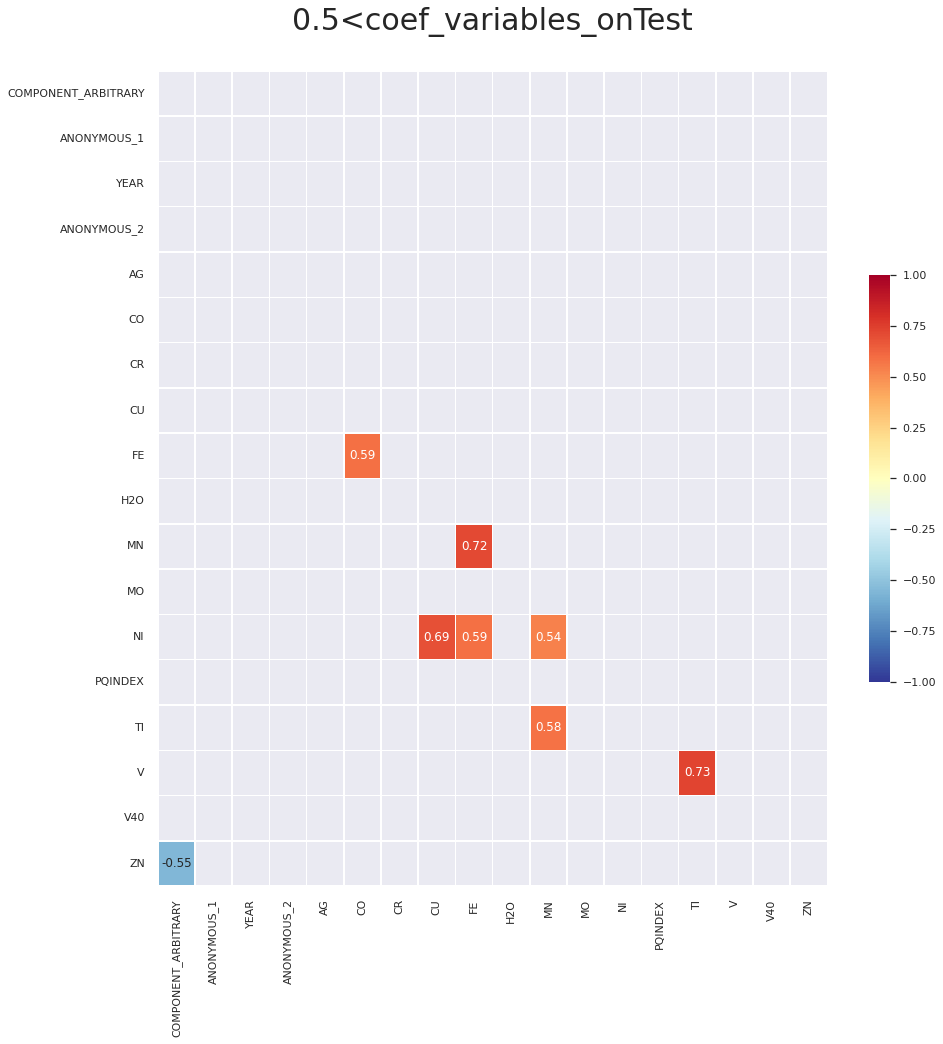

In [ ]:
data = test.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data[abs(data)>0.5], 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title('0.5<coef_variables_onTest\n',fontsize=30)  
plt.show()

결측치가 없는 Test셋에서는.

 - MN & FE ( 0.72)
 - NI & FE ( 0.59)
 - NI & CU ( 0.69)
 - NI & MN ( 0.54)
 - TI & MN ( 0.58)
 - V  & TI (0.73) 
 - FE & CO ( 0.59)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


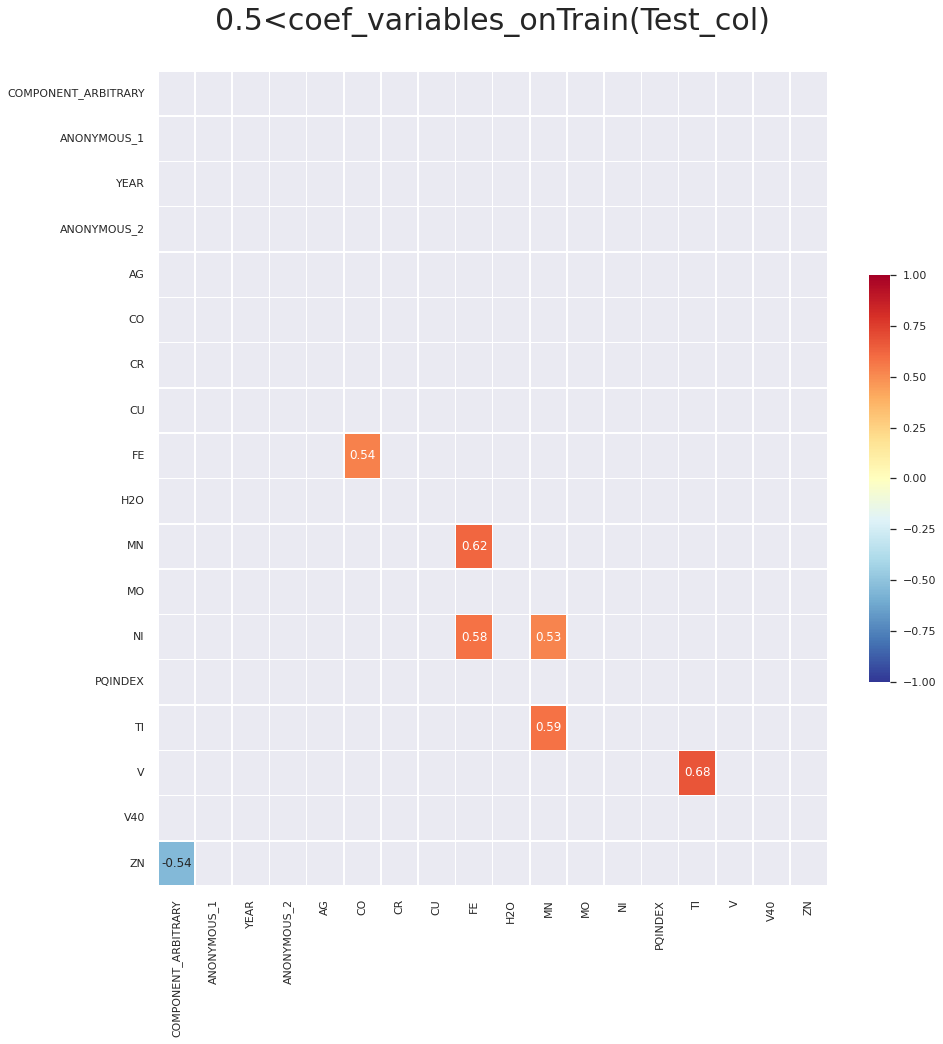

In [ ]:
data = train[test.columns].corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,15) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data[abs(data)>0.5], 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title('0.5<coef_variables_onTrain(Test_col)\n',fontsize=30)  
plt.show()

결측치가 있는 Train셋에서는.

 - MN & FE ( 0.62)
 - NI & FE ( 0.58)

 - NI & MN ( 0.53)
 - TI & MN ( 0.59)
 - V  & TI (0.68) 
 - FE & CO ( 0.54)

 

---
NI & CU 높은 상관관계가 사라짐.

-> 결측치를 제거 (iterative or knn) 한 후에
test분포와 비교해봄으로써, 합리적인 대체인지 확인한다. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


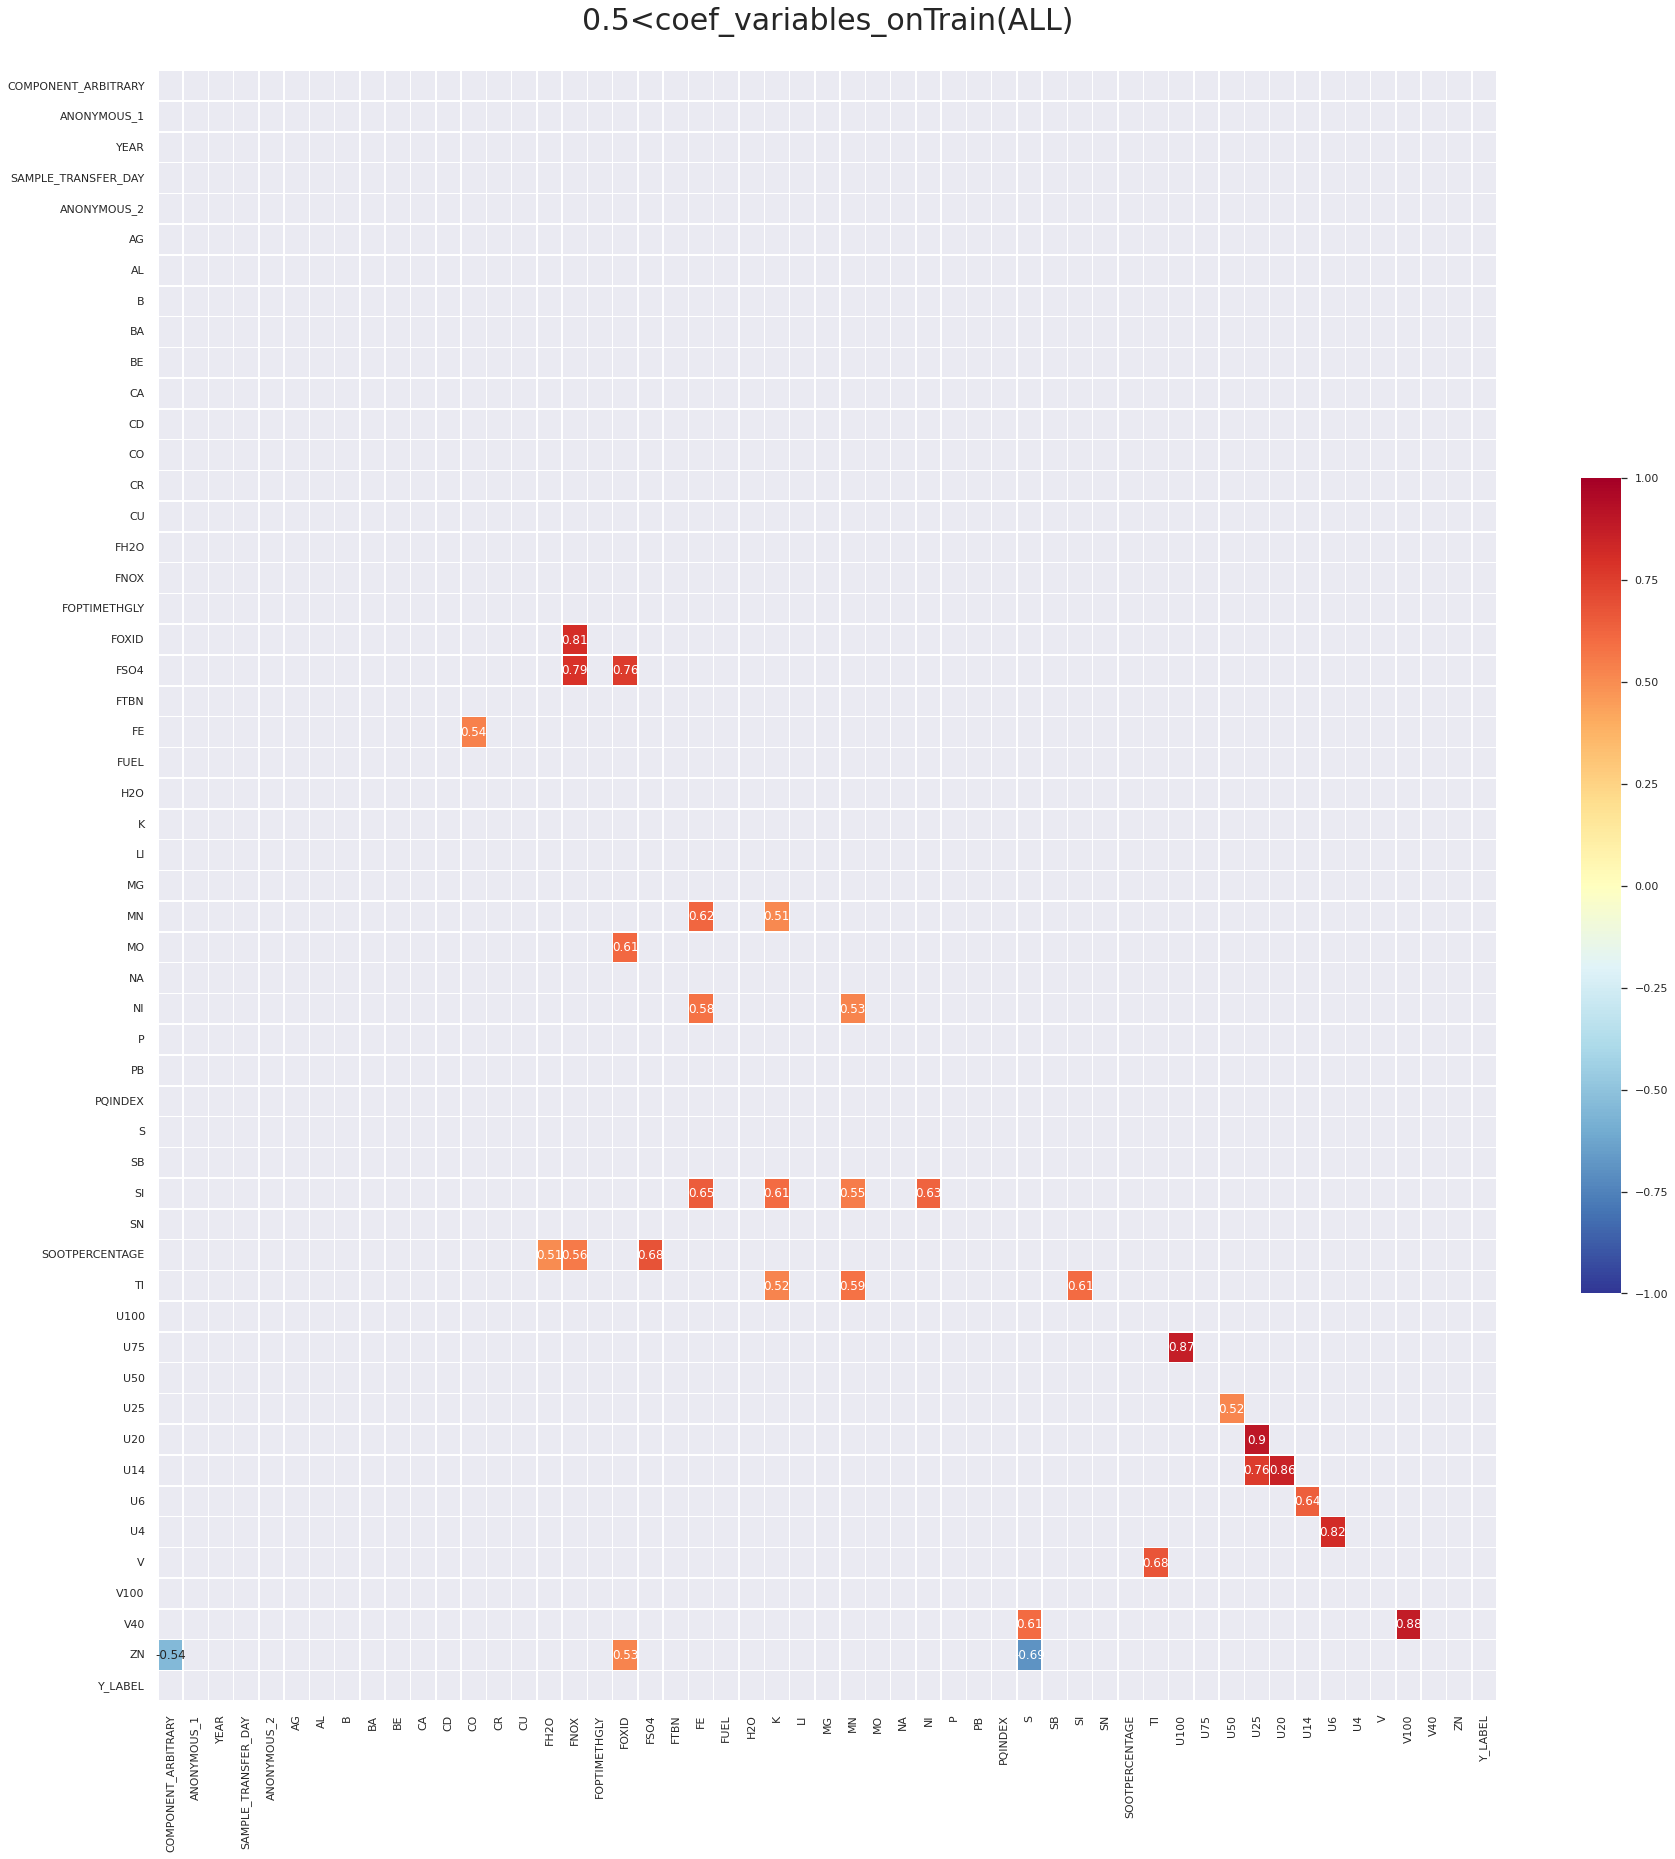

In [ ]:
data = train.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(30,30) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(data[abs(data)>0.5], 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.title('0.5<coef_variables_onTrain(ALL)\n',fontsize=30)  
plt.show()

In [ ]:
print(train[train['COMPONENT_ARBITRARY']==3].isnull().sum())
train_c0=train[train['COMPONENT_ARBITRARY']==3]
print(train_c0.shape)

ID                       0
COMPONENT_ARBITRARY      0
ANONYMOUS_1              0
YEAR                     0
SAMPLE_TRANSFER_DAY      0
ANONYMOUS_2              0
AG                       0
AL                       0
B                        0
BA                       0
BE                       0
CA                       0
CD                      79
CO                       0
CR                       0
CU                       0
FH2O                   839
FNOX                   839
FOPTIMETHGLY           839
FOXID                  839
FSO4                   839
FTBN                   839
FE                       0
FUEL                   839
H2O                      0
K                      123
LI                       0
MG                       0
MN                       0
MO                       0
NA                       0
NI                       0
P                        0
PB                       0
PQINDEX                  0
S                        0
SB                       0
S

In [ ]:
train_c0[train_c0['Y_LABEL']==1].isnull().sum()

ID                       0
COMPONENT_ARBITRARY      0
ANONYMOUS_1              0
YEAR                     0
SAMPLE_TRANSFER_DAY      0
ANONYMOUS_2              0
AG                       0
AL                       0
B                        0
BA                       0
BE                       0
CA                       0
CD                      37
CO                       0
CR                       0
CU                       0
FH2O                   206
FNOX                   206
FOPTIMETHGLY           206
FOXID                  206
FSO4                   206
FTBN                   206
FE                       0
FUEL                   206
H2O                      0
K                       10
LI                       0
MG                       0
MN                       0
MO                       0
NA                       0
NI                       0
P                        0
PB                       0
PQINDEX                  0
S                        0
SB                       0
S

In [ ]:
train_c0.FH2O

1       NaN
2       NaN
15      NaN
16      NaN
27      NaN
         ..
14079   NaN
14085   NaN
14089   NaN
14093   NaN
14094   NaN
Name: FH2O, Length: 2316, dtype: float32

Text(0.5, 1.0, 'FH20')

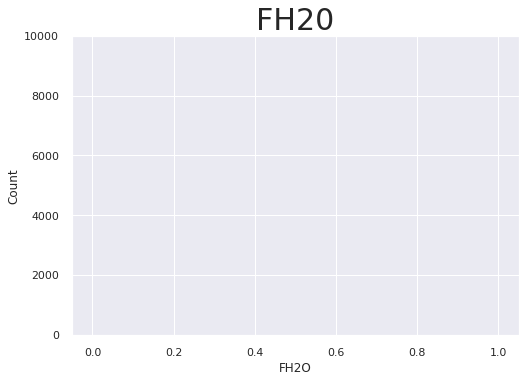

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train_c0[train_c0.Y_LABEL==0]['FH2O'], ax=ax,color='blue',kde=True)
#sns.histplot(train_c0[(train_c0.Y_LABEL==0)&(train_c0.K==np.NaN)]['K'], ax=ax,color='yellow',stat='probability')  
sns.histplot(train_c0[train_c0.Y_LABEL==1]['FH2O'],color='red', ax=ax,kde=True)
#sns.histplot(train_c0[(train_c0.Y_LABEL==1)&(train_c0.K==np.NaN)]['K'], ax=ax,color='green',stat='probability')  
# distplot is deprecate and replaced by histplot
#ax.set_xlim(0,10000)
ax.set_ylim(0,10000)

ax.set_title('FH20',fontsize=30)

In [ ]:
fig, ax = plt.subplots()
sns.histplot(train_c0['K'], ax=ax,color='blue',kde=True)  
sns.histplot(train_c0[train_c0.Y_LABEL==1]['K'],color='red', ax=ax,kde=True)  
# distplot is deprecate and replaced by histplot
ax.set_xlim(0,100)
ax.set_ylim(0,400)

ax.set_title('K')

In [ ]:
train[train['COMPONENT_ARBITRARY']==1].isnull().sum()

ID                        0
COMPONENT_ARBITRARY       0
ANONYMOUS_1               0
YEAR                      0
SAMPLE_TRANSFER_DAY       0
ANONYMOUS_2               0
AG                        0
AL                        0
B                         0
BA                        0
BE                        0
CA                        0
CD                      336
CO                        0
CR                        0
CU                        0
FH2O                   2316
FNOX                   2316
FOPTIMETHGLY           2316
FOXID                  2316
FSO4                   2316
FTBN                   2316
FE                        0
FUEL                   2316
H2O                       0
K                       200
LI                        0
MG                        0
MN                        0
MO                        0
NA                        0
NI                        0
P                         0
PB                        0
PQINDEX                   0
S                   

In [ ]:
train[train['COMPONENT_ARBITRARY']==2].isnull().sum()

ID                        0
COMPONENT_ARBITRARY       0
ANONYMOUS_1               0
YEAR                      0
SAMPLE_TRANSFER_DAY       0
ANONYMOUS_2               0
AG                        0
AL                        0
B                         0
BA                        0
BE                        0
CA                        0
CD                      331
CO                        0
CR                        0
CU                        0
FH2O                   7050
FNOX                   7050
FOPTIMETHGLY           7050
FOXID                  7050
FSO4                   7050
FTBN                   7050
FE                        0
FUEL                   7050
H2O                       0
K                      1648
LI                        0
MG                        0
MN                        0
MO                        0
NA                        0
NI                        0
P                         0
PB                        0
PQINDEX                   0
S                   

In [ ]:
train[train['COMPONENT_ARBITRARY']==3].isnull().sum()

ID                       0
COMPONENT_ARBITRARY      0
ANONYMOUS_1              0
YEAR                     0
SAMPLE_TRANSFER_DAY      0
ANONYMOUS_2              0
AG                       0
AL                       0
B                        0
BA                       0
BE                       0
CA                       0
CD                      79
CO                       0
CR                       0
CU                       0
FH2O                   839
FNOX                   839
FOPTIMETHGLY           839
FOXID                  839
FSO4                   839
FTBN                   839
FE                       0
FUEL                   839
H2O                      0
K                      123
LI                       0
MG                       0
MN                       0
MO                       0
NA                       0
NI                       0
P                        0
PB                       0
PQINDEX                  0
S                        0
SB                       0
S

# Simple_profile

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(train)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file="train_profiling.html") # html

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 결측치 처리하기.

In [13]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
train.describe()

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,2316.000000,2316.000000,2118.000000,2118.000000,2118.000000,14095.000000,3724.000000,14095.000000,14095.000000,14095.000000
mean,1.343242,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,...,29.870897,56.063473,239.938156,5488.692871,19415.595703,0.050656,13.576231,109.355820,588.646825,0.085349
std,0.946841,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,...,97.459625,184.332672,685.053467,15474.146484,40145.312500,0.475438,1.073718,49.612381,531.743393,0.279411
min,0.000000,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,15.000000,154.000000,0.000000,5.200000,2.900000,0.000000,0.000000
25%,0.000000,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,3.000000,5.000000,22.000000,636.750000,5409.250000,0.000000,12.900000,71.800003,37.000000,0.000000
50%,2.000000,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,...,7.000000,13.000000,57.000000,1753.000000,12691.500000,0.000000,13.500000,111.300003,520.000000,0.000000
75%,2.000000,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,...,23.000000,39.250000,189.000000,5517.750000,24535.750000,0.000000,14.200000,137.199997,1119.000000,0.000000
max,3.000000,294451.000000,2022.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,...,1651.000000,2932.000000,11296.000000,412627.000000,844421.000000,17.000000,29.900000,2840.500000,2132.000000,1.000000


- 간단한 샘플 결과제출을 위한 knn_imputer적용 

In [14]:
train=train.drop('ID',axis=1) # 필요없는 ID제거.
test=test.drop('ID',axis=1)

- 좀더 합리적인 결측치처리가 필요함. 

- knn_imputer

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [15]:
zero_fill = ['FH2O','FNOX','FOXID','FSO4','FOPTIMETHGLY','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20']
for i in zero_fill:
  comp0[i]=comp0[i].fillna(0)

  comp1[i]=comp1[i].fillna(0)
  comp2[i]=comp2[i].fillna(0)
  comp3[i]=comp3[i].fillna(0)


In [16]:
zero_fill1=['U14','U6','U4']

for i in zero_fill1:
   comp0[i]=comp0[i].fillna(0)
   comp2[i]=comp2[i].fillna(0)
   comp3[i]=comp3[i].fillna(0)

  

In [17]:
comp1['V100']=comp1['V100'].fillna(0)
comp2['V100']=comp2['V100'].fillna(0)
comp3['V100']=comp3['V100'].fillna(0)

In [ ]:
train.columns

Index(['ID', 'COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR',
       'SAMPLE_TRANSFER_DAY', 'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA',
       'CD', 'CO', 'CR', 'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4',
       'FTBN', 'FE', 'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI',
       'P', 'PB', 'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI',
       'U100', 'U75', 'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100',
       'V40', 'ZN', 'Y_LABEL'],
      dtype='object')

In [18]:
comp0=comp0.drop('ID',axis=1)
comp1=comp1.drop('ID',axis=1)
comp2=comp2.drop('ID',axis=1)
comp3=comp3.drop('ID',axis=1)

In [19]:


imputer = KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(comp0)
comp0=pd.DataFrame(data_imputed)
comp0.columns=train.columns

imputer = KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(comp1)
comp1=pd.DataFrame(data_imputed)
comp1.columns=train.columns

imputer = KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(comp2)
comp2=pd.DataFrame(data_imputed)
comp2.columns=train.columns

imputer = KNNImputer(n_neighbors=2)
data_imputed=imputer.fit_transform(comp3)
comp3=pd.DataFrame(data_imputed)
comp3.columns=train.columns


temp=pd.concat([comp0,comp1,comp2,comp3])
temp
#train=temp

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,0.0,6748.0,2015.0,6.0,200.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.4,98.900002,1020.0,0.0
1,0.0,1959.0,2008.0,5.0,200.0,0.0,1.0,6.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.1,97.599998,1171.0,0.0
2,0.0,2080.0,2010.0,5.0,200.0,0.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.8,111.500000,1003.0,0.0
3,0.0,1991.0,2008.0,7.0,200.0,0.0,26.0,32.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.5,109.199997,1250.0,1.0
4,0.0,2043.0,2011.0,8.0,1243.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.9,83.199997,1063.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,3.0,1585.0,2009.0,24.0,200.0,0.0,7.0,198.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.699997,1114.0,0.0
835,3.0,1371.0,2010.0,13.0,372.0,0.0,4.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.900002,1188.0,0.0
836,3.0,1690.0,2009.0,9.0,200.0,0.0,6.0,145.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.000000,1081.0,0.0
837,3.0,7613.0,2017.0,3.0,6850.0,0.0,3.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.400002,1066.0,0.0


In [ ]:
temp.columns

Index(['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'SAMPLE_TRANSFER_DAY',
       'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR',
       'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FE',
       'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB',
       'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI', 'U100', 'U75',
       'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100', 'V40', 'ZN',
       'Y_LABEL'],
      dtype='object')

In [20]:
temp[['YEAR','COMPONENT_ARBITRARY','Y_LABEL']]=temp[['YEAR','COMPONENT_ARBITRARY','Y_LABEL']].astype('int')

In [21]:
test[['YEAR','COMPONENT_ARBITRARY']]=test[['YEAR','COMPONENT_ARBITRARY']].astype('int')

- simple_imputer

In [ ]:
from sklearn.impute import SimpleImputer

# 중간값으로 Imputer 선언
imputer_mid = SimpleImputer(strategy='median')
imputer_mid.fit(train)
data_imputed=imputer_mid.transform(train)
temp=pd.DataFrame(data_imputed)

- iterative_imputer

In [ ]:
imputer_it = IterativeImputer(max_iter = 30, random_state = 0)
data_imputed=imputer_it.fit_transform(train)
temp=pd.DataFrame(data_imputed)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
temp.columns = train.columns

In [ ]:
train=temp

#Scaling ( MinMax Scaler | Quantile| Power(BOXCOX)

In [23]:
test_num_col=list(test.columns[(test.columns !='YEAR') & (test.columns !='COMPONENT_ARBITRARY') ])

In [24]:
int32_col=list(train.columns[train.dtypes=='int32'])
float32_col=list(train.columns[train.dtypes=='float32'])

In [25]:
num_val=int32_col +float32_col

-student test셋에 해당하는 num컬럼에 대해서 먼저 스케일링진행하기.

In [26]:
#int64_col float64_col
# test에 해당하는 num열 스케일링.
#here
from sklearn.preprocessing import MinMaxScaler, PowerTransformer,StandardScaler

min_max=test_num_col
train_num = temp[min_max].copy()

test_num = test[min_max].copy()


scaler=MinMaxScaler()

scaler.fit(train_num)

train_num[min_max]=scaler.transform(train_num[min_max])



test_num[min_max]=scaler.transform(test_num[min_max]) # leakage 주의


temp[min_max] = train_num[min_max]
test[min_max] = test_num[min_max]  

In [ ]:
for i in test_num_col:
  print(i," : ",skew(temp[i]))
  print("test"," : ",skew(test[i]))

NameError: ignored

- Qunantile_transformer

In [ ]:
#int64_col float64_col
# test에 해당하는 num열 스케일링.

from sklearn.preprocessing import MinMaxScaler, StandardScaler,QuantileTransformer

min_max=test_num_col
train_num = temp[min_max].copy()

test_num = test[min_max].copy()


scaler=QuantileTransformer(n_quantiles=1000)

scaler.fit(train_num)

train_num[min_max]=scaler.transform(train_num[min_max])



test_num[min_max]=scaler.transform(test_num[min_max]) # leakage 주의


temp[min_max] = train_num[min_max]
test[min_max] = test_num[min_max]  

- train에만 해당하는 num컬럼 스케일링하기
          (Choose one! [1: 'MinMax' , 2: 'QuantileTrans'])

- test에 있는 수치적 특성들과 'year' , 'SAMPLE_TRANSFER_DAY'제외해주기.

In [27]:
train_num_col = [x for x in num_val if x not in test_num_col]


In [28]:
num_val

['ANONYMOUS_1',
 'YEAR',
 'SAMPLE_TRANSFER_DAY',
 'ANONYMOUS_2',
 'AG',
 'AL',
 'B',
 'BA',
 'BE',
 'CA',
 'CO',
 'CR',
 'CU',
 'FE',
 'LI',
 'MG',
 'MN',
 'MO',
 'NA',
 'NI',
 'P',
 'PB',
 'PQINDEX',
 'S',
 'SB',
 'SI',
 'SN',
 'TI',
 'V',
 'ZN',
 'Y_LABEL',
 'CD',
 'FH2O',
 'FNOX',
 'FOPTIMETHGLY',
 'FOXID',
 'FSO4',
 'FTBN',
 'FUEL',
 'H2O',
 'K',
 'SOOTPERCENTAGE',
 'U100',
 'U75',
 'U50',
 'U25',
 'U20',
 'U14',
 'U6',
 'U4',
 'V100',
 'V40']

In [29]:
tmp = ['YEAR','Y_LABEL']
train_num_col = [x for x in num_val if x not in tmp]

-teacher train셋에 해당하는 num컬럼에 대해서 스케일링진행하기.

In [30]:
from sklearn.preprocessing import RobustScaler,QuantileTransformer, StandardScaler
#here
min_max=train_num_col
train_num = temp[min_max].copy()

scaler=MinMaxScaler()

scaler.fit(train_num)

train_num[min_max]=scaler.transform(train_num[min_max])


temp[min_max] = train_num[min_max]


- Qunantile_transformer

In [ ]:
#int64_col float64_col
# teacher_train에 해당하는 num열 스케일링.

from sklearn.preprocessing import MinMaxScaler, StandardScaler,QuantileTransformer

min_max=train_num_col
train_num = temp[min_max].copy()

scaler=QuantileTransformer(n_quantiles=1000) # 분위수는 조절가능.

scaler.fit(train_num)


train_num[min_max]=scaler.transform(train_num[min_max])


temp[min_max] = train_num[min_max]

In [ ]:
for i in train_num_col:
  print(i," : ",skew(temp[i]))
 

ANONYMOUS_1  :  -0.0016663725613950567
SAMPLE_TRANSFER_DAY  :  0.012261104693141536
ANONYMOUS_2  :  0.7089077163124103
AG  :  6.26309603908196
AL  :  -0.17982424431324917
B  :  -0.07243023522473797
BA  :  1.2739602272119481
BE  :  16.53410091953154
CA  :  8.694471753691545e-05
CO  :  6.6694151333575
CR  :  0.027960415893214473
CU  :  -0.13540272001795536
FE  :  -0.00010256358158850302
LI  :  2.9644613946733216
MG  :  -0.1421644247714633
MN  :  0.19307951813733137
MO  :  0.10211763336834496
NA  :  -0.17485402390507518
NI  :  1.3867236921326775
P  :  -4.0156576172917326e-05
PB  :  0.46847456237141744
PQINDEX  :  0.0007960475438000537
S  :  -3.060344221985155e-05
SB  :  1.437818384331873
SI  :  -0.027252097894997322
SN  :  0.9584199154675167
TI  :  2.8329183138523324
V  :  5.688568304461935
ZN  :  0.00018305020571766432
CD  :  8.215334411366907
FH2O  :  -0.0009653934795504466
FNOX  :  0.15930095006922582
FOPTIMETHGLY  :  -0.27600986365467434
FOXID  :  -0.017711488112722745
FSO4  :  -0.076

#Feature_Selection (model_based)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=700,random_state=42),threshold='mean')


In [33]:
y=temp['Y_LABEL']
temp=temp.drop('Y_LABEL',axis=1)
select.fit(temp,y)
f_temp=select.transform(temp)

f_temp.shape

NameError: ignored

In [ ]:
f_temp.as

AttributeError: ignored

# LGBM Classifier or XGBOOST ( choose one!)

- valid_set .2로 설정. (Hold_Out으로 일단 확인)
- K-Fold를 통해 평균을 냄으로써, 과적합 및 일반화 성능을 올려야함.

In [ ]:
test.columns

Index(['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'ANONYMOUS_2', 'AG', 'CO',
       'CR', 'CU', 'FE', 'H2O', 'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40',
       'ZN'],
      dtype='object')

In [31]:
temp=temp.drop('SAMPLE_TRANSFER_DAY',axis=1)

In [36]:
#y=temp['Y_LABEL']
#temp=temp.drop('Y_LABEL',axis=1)
x_train , x_valid , y_train, y_valid=train_test_split(temp,y,test_size=.2,random_state=5)

In [37]:
temp

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,U50,U25,U20,U14,U6,U4,V,V100,V40,ZN
0,0,0.019588,2015,0.000000,0.0,0.000216,0.000488,0.000000,0.0,0.009381,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448161,0.033831,0.478424
1,0,0.003268,2008,0.000000,0.0,0.000216,0.002925,0.009259,0.0,0.001210,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438127,0.033373,0.549250
2,0,0.003680,2010,0.000000,0.0,0.000000,0.014627,0.000000,0.0,0.004842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.461538,0.038272,0.470450
3,0,0.003377,2008,0.000000,0.0,0.005616,0.015602,0.013889,0.0,0.009079,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451505,0.037461,0.586304
4,0,0.003554,2011,0.110370,0.0,0.000000,0.002925,0.000000,0.0,0.011953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397993,0.028299,0.498593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,3,0.001994,2009,0.000000,0.0,0.001512,0.096538,0.000000,0.0,0.498411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023541,0.522514
835,3,0.001264,2010,0.018201,0.0,0.000864,0.007314,0.000000,0.0,0.541837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.026431,0.557223
836,3,0.002351,2009,0.000000,0.0,0.001296,0.070697,0.000000,0.0,0.534271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028228,0.507036
837,3,0.022535,2017,0.703704,0.0,0.000648,0.000975,0.000000,0.0,0.501437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023788,0.500000


- LGBM

- 카테고리컬 컬럼에 대해서 전처리.
(LGBM은 category 타입으로 지정해주면 categorical하게 처리한다.)

In [ ]:
temp[['YEAR','COMPONENT_ARBITRARY']]=temp[['YEAR','COMPONENT_ARBITRARY']].astype('category')

In [ ]:
test[['YEAR','COMPONENT_ARBITRARY']]=test[['YEAR','COMPONENT_ARBITRARY']].astype('category')

In [ ]:
temp.dtypes

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,roc_curve

- 아래쪽에 Optuna를 활용하여 파라미터튜닝을 간단히 할 수 있다.
- xgboost와 lgbm마다 파라미터 튜닝이 다르기 때문에 params를 구글링을 통해 바꾸어서 실행할것.

- xgboost ( xgboost는 카테고리컬하게 처리하기 위해선, 원핫 인코딩이나 라벨링(int형변수)이여야함.

In [38]:
temp[['COMPONENT_ARBITRARY', 'YEAR']] = temp[['COMPONENT_ARBITRARY', 'YEAR']].astype('int')
test[['COMPONENT_ARBITRARY', 'YEAR']] = test[['COMPONENT_ARBITRARY', 'YEAR']].astype('int')

In [39]:
import lightgbm as lgb
import xgboost as xgb
#import catboost as cb

- stratified_kfold 적용하기.

In [ ]:
from sklearn.model_selection import StratifiedKFold
f_temp=pd.DataFrame(f_temp)
# split 개수, 셔플 여부 및 seed 설정
model_history=[]
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)
clf = xgb.XGBClassifier(**cbrm_trial.params,use_missing=False,boost_from_average=False)
# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(f_temp,y):
    X_train, X_test = f_temp.loc[train_index], f_temp.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    clf.fit(X_train,y_train)
    val_pred=clf.predict(X_test)
    val_proba=clf.predict_proba(X_test)[:,1]
    get_clf_eval(y_test,val_pred,val_proba)
    model_history.append(clf)








In [47]:
#here
clf = xgb.XGBClassifier(**cbrm_trial.params,use_missing=False,boost_from_average=False)
clf.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],early_stopping_rounds=60,verbose=True)

[0]	validation_0-error:0.044342
Will train until validation_0-error hasn't improved in 60 rounds.
[1]	validation_0-error:0.043632
[2]	validation_0-error:0.041859
[3]	validation_0-error:0.041149
[4]	validation_0-error:0.041149
[5]	validation_0-error:0.041149
[6]	validation_0-error:0.04044
[7]	validation_0-error:0.040795
[8]	validation_0-error:0.040795
[9]	validation_0-error:0.040085
[10]	validation_0-error:0.038666
[11]	validation_0-error:0.039021
[12]	validation_0-error:0.038666
[13]	validation_0-error:0.038311
[14]	validation_0-error:0.038311
[15]	validation_0-error:0.03973
[16]	validation_0-error:0.039376
[17]	validation_0-error:0.039376
[18]	validation_0-error:0.03973
[19]	validation_0-error:0.03973
[20]	validation_0-error:0.038666
[21]	validation_0-error:0.039376
[22]	validation_0-error:0.038311
[23]	validation_0-error:0.039376
[24]	validation_0-error:0.039021
[25]	validation_0-error:0.039376
[26]	validation_0-error:0.038666
[27]	validation_0-error:0.039376
[28]	validation_0-error:

XGBClassifier(boost_from_average=False, learning_rate=0.23720667234749193,
              max_depth=10, n_estimators=1100, use_missing=False)

{'max_depth': 10, 'learning_rate': 0.23720667234749193, 'n_estimators': 1100}

- catboost 

- lgbm(category -> astype('categry')로 변경해주면됨.
위에 코드 존재.

In [ ]:

from sklearn.model_selection import StratifiedKFold

# split 개수, 셔플 여부 및 seed 설정
model_history=[]
val_history=[]
val_pred_hist=[]
str_kf = StratifiedKFold(n_splits = 5)
lgb_clf = lgb.LGBMClassifier(n_estimators=1000, boosting_type='gbdt',learning_rate=0.23,max_depth=8, n_jobs=-1,boost_from_average=False)
# split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
for train_index, test_index in str_kf.split(temp,y):
    X_train, X_test = temp.loc[train_index], temp.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    lgb_clf.fit(X_train,y_train)
    val_pred=lgb_clf.predict(X_test)
    val_pred_hist.append(val_pred)
    val_proba=lgb_clf.predict_proba(X_test)[:,1]
    val_history.append(val_proba)
    get_clf_eval(y_test,val_pred,val_proba)
    

In [ ]:
lgb_clf = lgb.LGBMClassifier(n_estimators=1000, boosting_type='gbdt',use_missing=False,learning_rate=0.23,max_depth=8, n_jobs=-1,boost_from_average=False)

In [ ]:
lgb_clf.fit(x_train,y_train,eval_set=[(x_valid,y_valid)],verbose=True,early_stopping_rounds=200,eval_metric='logloss')

[1]	valid_0's binary_logloss: 0.521458	valid_0's binary_logloss: 0.521458
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.412817	valid_0's binary_logloss: 0.412817
[3]	valid_0's binary_logloss: 0.339372	valid_0's binary_logloss: 0.339372
[4]	valid_0's binary_logloss: 0.287004	valid_0's binary_logloss: 0.287004
[5]	valid_0's binary_logloss: 0.249242	valid_0's binary_logloss: 0.249242
[6]	valid_0's binary_logloss: 0.221689	valid_0's binary_logloss: 0.221689
[7]	valid_0's binary_logloss: 0.201396	valid_0's binary_logloss: 0.201396
[8]	valid_0's binary_logloss: 0.186416	valid_0's binary_logloss: 0.186416
[9]	valid_0's binary_logloss: 0.175052	valid_0's binary_logloss: 0.175052
[10]	valid_0's binary_logloss: 0.167029	valid_0's binary_logloss: 0.167029
[11]	valid_0's binary_logloss: 0.160351	valid_0's binary_logloss: 0.160351
[12]	valid_0's binary_logloss: 0.155989	valid_0's binary_logloss: 0.155989
[13]	valid_0's binary_logloss: 0.153084	valid_

LGBMClassifier(boost_from_average=False, learning_rate=0.23, max_depth=8,
               n_estimators=1000, use_missing=False)

- 혼동행렬, 정확도(AC), 정밀도(PR), 재현율(RR), F1(MACRO), AUC 출력. 

In [48]:
def get_clf_eval(y_test, y_pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    m_F1 = f1_score(y_test, y_pred,average='macro')
    AUC = roc_auc_score(y_test, pred_proba)

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('MACRO_F1: {:.4f}'.format(m_F1))
    print('AUC: {:.4f}'.format(AUC))

- valid_set으로 예측한 macro-f1 score
(xgb)


In [49]:
#here
val_pred=clf.predict(x_valid)
val_proba=clf.predict_proba(x_valid)[:,1]
get_clf_eval(y_valid,val_pred,val_proba)


오차행렬:
 [[2600    9]
 [  97  113]]

정확도: 0.9624
정밀도: 0.9262
재현율: 0.5381
F1: 0.6807
MACRO_F1: 0.8304
AUC: 0.8948


오차행렬:
 [[2597   12]
 [  96  114]]

정확도: 0.9617
정밀도: 0.9048
재현율: 0.5429
F1: 0.6786
MACRO_F1: 0.8291
AUC: 0.8867

- valid_set으로 예측한 macro-f1 score
(lgb)


In [ ]:
val_pred=lgb_clf.predict(x_valid)
val_proba=lgb_clf.predict_proba(x_valid)[:,1]
get_clf_eval(y_valid,val_pred,val_proba)

오차행렬:
 [[2598   11]
 [  99  111]]

정확도: 0.9610
정밀도: 0.9098
재현율: 0.5286
F1: 0.6687
MACRO_F1: 0.8240
AUC: 0.8876


- train proba 예측 및 컬럼 생성.
    - xgb train_proba

In [50]:
#here
val_pred=clf.predict(temp)
val_proba=clf.predict_proba(temp)[:,1]
get_clf_eval(y,val_pred,val_proba)

오차행렬:
 [[12883     9]
 [  109  1094]]

정확도: 0.9916
정밀도: 0.9918
재현율: 0.9094
F1: 0.9488
MACRO_F1: 0.9721
AUC: 0.9840


In [ ]:
temp.dtypes

- lgbm train_proba

In [ ]:
val_pred=lgb_clf.predict(temp)
val_proba=lgb_clf.predict_proba(temp)[:,1]
get_clf_eval(y,val_pred,val_proba)

오차행렬:
 [[12872    20]
 [  457   746]]

정확도: 0.9662
정밀도: 0.9739
재현율: 0.6201
F1: 0.7577
MACRO_F1: 0.8698
AUC: 0.9669


In [ ]:
x_valid.dtypes

# 이젠 test_col X로 위에서 나온 확률 값을 예측하고, test set prediction 

- lgbm_regressor를 사용해서 test_col X로 proba예측


In [51]:
temp_regress = temp[test.columns]

In [52]:
temp_regress['Y_PROBA']=val_proba

<ipython-input-52-b2415e5d24d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_regress['Y_PROBA']=val_proba


In [ ]:
temp_regress.Y_PROBA

0      0.009877
1      0.031640
2      0.016872
3      0.991786
4      0.004828
         ...   
834    0.005427
835    0.000978
836    0.010584
837    0.001619
838    0.005213
Name: Y_PROBA, Length: 14095, dtype: float32

In [ ]:
temp_regress.dtypes

COMPONENT_ARBITRARY      int64
ANONYMOUS_1            float64
YEAR                     int64
ANONYMOUS_2            float64
AG                     float64
CO                     float64
CR                     float64
CU                     float64
FE                     float64
H2O                    float64
MN                     float64
MO                     float64
NI                     float64
PQINDEX                float64
TI                     float64
V                      float64
V40                    float64
ZN                     float64
Y_PROBA                float64
dtype: object

In [ ]:
test

,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.300003,1091
1,2,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.900002,12
2,1,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.299999,714
3,2,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.800003,94
4,1,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.400002,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2,1714,2014,200,0,0,3,130,1047,0.0,65,5,2,1999,0,0,71.199997,1163
6037,2,4131,2016,200,0,0,5,2,736,0.0,5,0,0,693,0,0,137.800003,13
6038,2,4325,2014,200,0,0,0,0,53,0.0,0,0,0,69,0,0,302.200012,13
6039,1,1364,2013,200,0,0,0,62,2,0.0,0,0,0,5,0,0,51.099998,478


# Proba 예측을 위한 회귀 모형 생성.

- valid_set .2로 설정. (Hold_Out으로 일단 확인)

In [53]:
y_regress=temp_regress['Y_PROBA']
temp_regress=temp_regress.drop('Y_PROBA',axis=1)

#Feature_Selection (model_based)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
select = SelectFromModel(
    RandomForestRegressor(n_estimators=1000,random_state=42),threshold='mean')


In [ ]:
#y=temp['Y_LABEL']
#temp=temp.drop('Y_LABEL',axis=1)
select.fit(temp_regress,y_regress)
f_temp=select.transform(temp_regress)
t_temp=select.transform(test)
f_temp.shape

In [54]:

x_r_train , x_r_valid , y_r_train, y_r_valid=train_test_split(temp_regress,y_regress,test_size=.2,random_state=5)

- lgb

In [55]:
import lightgbm as lgb
#here
clf_r = lgb.LGBMRegressor(n_estimators=2000,learning_rate=0.01, max_depth=13, n_jobs=-1, 
                         boost_from_average=False)



- lgb_optuna

In [ ]:
import lightgbm as lgb
#here
clf_r = lgb.LGBMRegressor(**trial_params,boost_from_average=False)


- xgb

In [ ]:

clf_x = xgb.XGBRegressor(**cbrm_trial.params,boost_from_average=False)



- 평가지표는 MeanAbsoluteError

- xgboost_regress

In [ ]:
clf_x.fit(x_r_train,y_r_train,eval_set=[(x_r_valid,y_r_valid)],verbose=True)

- lightgbm_regress

In [56]:
clf_r.fit(x_r_train,y_r_train,eval_set=[(x_r_valid,y_r_valid)],verbose=True,eval_metric='mae')

[1]	valid_0's l1: 0.0597774	valid_0's l2: 0.0407685
[2]	valid_0's l1: 0.0590064	valid_0's l2: 0.0406058
[3]	valid_0's l1: 0.0583844	valid_0's l2: 0.0404482
[4]	valid_0's l1: 0.0578954	valid_0's l2: 0.0402935
[5]	valid_0's l1: 0.0575252	valid_0's l2: 0.0401472
[6]	valid_0's l1: 0.0572343	valid_0's l2: 0.0400039
[7]	valid_0's l1: 0.0570009	valid_0's l2: 0.039854
[8]	valid_0's l1: 0.0568482	valid_0's l2: 0.039713
[9]	valid_0's l1: 0.0567466	valid_0's l2: 0.0395777
[10]	valid_0's l1: 0.0566989	valid_0's l2: 0.0394381
[11]	valid_0's l1: 0.0567074	valid_0's l2: 0.0393143
[12]	valid_0's l1: 0.056729	valid_0's l2: 0.039186
[13]	valid_0's l1: 0.0567886	valid_0's l2: 0.0390532
[14]	valid_0's l1: 0.0568712	valid_0's l2: 0.038928
[15]	valid_0's l1: 0.0569746	valid_0's l2: 0.0388052
[16]	valid_0's l1: 0.0570901	valid_0's l2: 0.0386892
[17]	valid_0's l1: 0.0572251	valid_0's l2: 0.0385723
[18]	valid_0's l1: 0.0573916	valid_0's l2: 0.0384645
[19]	valid_0's l1: 0.0575631	valid_0's l2: 0.0383717
[20]	va

LGBMRegressor(boost_from_average=False, learning_rate=0.01, max_depth=13,
              n_estimators=2000)

- lightgbm_performance

In [57]:
from sklearn.metrics import mean_absolute_error
val_r_prob=clf_r.predict(x_r_valid)
train_r_prob=clf_r.predict(x_r_train)
train_mae=mean_absolute_error(y_r_train,train_r_prob)
valid_mae=mean_absolute_error(y_r_valid,val_r_prob)
print('train_MAE: {:.4f}'.format(train_mae))
print('valid_MAE: {:.4f}'.format(valid_mae))


train_MAE: 0.1000
valid_MAE: 0.1045


- xgboost_performance

In [ ]:
from sklearn.metrics import mean_absolute_error
val_r_prob=clf_x.predict(x_r_valid)
train_r_prob=clf_x.predict(x_r_train)
train_mae=mean_absolute_error(y_r_train,train_r_prob)
valid_mae=mean_absolute_error(y_r_valid,val_r_prob)
print('train_MAE: {:.4f}'.format(train_mae))
print('valid_MAE: {:.4f}'.format(valid_mae))


train_MAE: 0.1997
valid_MAE: 0.1753


In [ ]:
x_r_valid.dtypes

In [ ]:
val_r_prob[val_r_prob>0.2].shape

(229,)

train_MAE: 0.0986
valid_MAE: 0.1192

# TEST set 예측 생성

- 최적 TH을 일단 찾기.

In [58]:
#train_mae=mean_absolute_error(y_r_train,train_r_prob)
for th in range(10,40,1):
  temp_sub = val_r_prob.copy()
  example=pd.DataFrame(temp_sub)
  example.columns=['pred']
  example['pred'][example['pred']>(th*0.01)]=1.0
  example['pred'][example['pred']<=(th*0.01)]=0.0

  m_F1 = f1_score(y_valid, example.pred,average='macro')
  print('th : {:.1f} MACRO_F1: {:.4f}'.format(th,m_F1))


th : 10.0 MACRO_F1: 0.5010
th : 11.0 MACRO_F1: 0.5145
th : 12.0 MACRO_F1: 0.5202
th : 13.0 MACRO_F1: 0.5246
th : 14.0 MACRO_F1: 0.5387
th : 15.0 MACRO_F1: 0.5478
th : 16.0 MACRO_F1: 0.5575
th : 17.0 MACRO_F1: 0.5555
th : 18.0 MACRO_F1: 0.5594
th : 19.0 MACRO_F1: 0.5612
th : 20.0 MACRO_F1: 0.5615
th : 21.0 MACRO_F1: 0.5667
th : 22.0 MACRO_F1: 0.5570
th : 23.0 MACRO_F1: 0.5628
th : 24.0 MACRO_F1: 0.5635
th : 25.0 MACRO_F1: 0.5572
th : 26.0 MACRO_F1: 0.5605
th : 27.0 MACRO_F1: 0.5577
th : 28.0 MACRO_F1: 0.5607
th : 29.0 MACRO_F1: 0.5584
th : 30.0 MACRO_F1: 0.5494
th : 31.0 MACRO_F1: 0.5480
th : 32.0 MACRO_F1: 0.5470
th : 33.0 MACRO_F1: 0.5473
th : 34.0 MACRO_F1: 0.5413
th : 35.0 MACRO_F1: 0.5351
th : 36.0 MACRO_F1: 0.5312
th : 37.0 MACRO_F1: 0.5321
th : 38.0 MACRO_F1: 0.5331
th : 39.0 MACRO_F1: 0.5297


In [ ]:
x_r_train.dtypes

COMPONENT_ARBITRARY      int64
ANONYMOUS_1            float64
YEAR                     int64
ANONYMOUS_2            float64
AG                     float64
CO                     float64
CR                     float64
CU                     float64
FE                     float64
H2O                    float64
MN                     float64
MO                     float64
NI                     float64
PQINDEX                float64
TI                     float64
V                      float64
V40                    float64
ZN                     float64
dtype: object

- xgb_prediction

In [59]:
sub_proba=clf_x.predict(test)

NameError: ignored

- lgbm_prediction

In [60]:
sub_proba=clf_r.predict(test)

In [61]:
sub_proba[sub_proba>0.2].shape

(561,)

In [62]:
example=pd.DataFrame(sub_proba)

example.columns=['pred']

In [63]:
example

,pred
0,0.051702
1,0.040244
2,0.191132
3,0.071837
4,0.207363
...,...
6036,-0.034819
6037,0.084896
6038,0.191783
6039,0.114100


- th는 변환가능.

In [64]:
example['pred'][example['pred']>0.21034]=1.0
example['pred'][example['pred']<=0.21034]=0.0

In [65]:
example.pred.value_counts()

0.0    5552
1.0     489
Name: pred, dtype: int64

In [ ]:
train.co

Index(['COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'YEAR', 'SAMPLE_TRANSFER_DAY',
       'ANONYMOUS_2', 'AG', 'AL', 'B', 'BA', 'BE', 'CA', 'CD', 'CO', 'CR',
       'CU', 'FH2O', 'FNOX', 'FOPTIMETHGLY', 'FOXID', 'FSO4', 'FTBN', 'FE',
       'FUEL', 'H2O', 'K', 'LI', 'MG', 'MN', 'MO', 'NA', 'NI', 'P', 'PB',
       'PQINDEX', 'S', 'SB', 'SI', 'SN', 'SOOTPERCENTAGE', 'TI', 'U100', 'U75',
       'U50', 'U25', 'U20', 'U14', 'U6', 'U4', 'V', 'V100', 'V40', 'ZN',
       'Y_LABEL'],
      dtype='object')

In [ ]:
train.YEAR.nunique()

16

# 제출파일 형성.

In [ ]:
submit=pd.read_csv('/content/drive/MyDrive/DACON_Dataset/Hyundai_oil/sample_submission.csv')

In [ ]:
example.pred = example.pred.astype('int32')

In [ ]:
submit.Y_LABEL = example.pred

In [ ]:
submit.to_csv('/content/drive/MyDrive/DACON_Dataset/Hyundai_oil/sample7_sub.csv',index=False)

#Optuna_Tuning ( first_classification)

In [40]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [ ]:
x_train.dtypes

    cbrm_param = {
        "objective": "binary:logistic",
        "eval_metric":'logloss',
        "booster": 'gbtree',
        #'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
        "tree_method": 'gpu_hist', 'gpu_id': 0,  # CPU 사용시
        "verbosity": 0,
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_uniform('learning_rate', 0.08, 0.3),
        'n_estimators': trial.suggest_int("n_estimators",100,1000 ,step=50),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 0.7),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.9, 1.0),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-2, 1),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-2, 1),
        'subsample': trial.suggest_discrete_uniform('subsample', 0.6, 1.0, 0.05),     
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 15),
        "gamma": trial.suggest_float("gamma", 0.1, 1.0, log=True)
    }

Best Trial: score 0.8269007480183096,
params {'max_depth': 4, 'learning_rate': 0.23077916004091537, 'n_estimators': 1000}

In [41]:
temp[['COMPONENT_ARBITRARY', 'YEAR']] = temp[['COMPONENT_ARBITRARY', 'YEAR']].astype('int')
test[['COMPONENT_ARBITRARY', 'YEAR']] = test[['COMPONENT_ARBITRARY', 'YEAR']].astype('int')

In [44]:
# 데이터 분리에서 x_train , x_valid , y_train , y_valid 
#분리해놓은 것을 통해 최적 파라미터를 탐색한다.
#Best Trial: score 0.8174589706374902,
#params {'max_depth': 6, 'learning_rate': 0.0896457098432712, 'n_estimators': 800, 'colsample_bytree': 0.5569921809317748, 'colsample_bylevel': 0.9143406631538383, 'colsample_bynode': 0.5234481596946249, 'reg_lambda': 0.17888515294488294, 'reg_alpha': 0.12450084866814962, 'subsample': 0.95, 'min_child_weight': 4, 'gamma': 0.7192010329138374}
# random sampler

#Best Trial: score 0.8174589706374902,
#params {'max_depth': 6, 'learning_rate': 0.0896457098432712, 'n_estimators': 800, 'colsample_bytree': 0.5569921809317748, 'colsample_bylevel': 0.9143406631538383, 'colsample_bynode': 0.5234481596946249, 'reg_lambda': 0.17888515294488294, 'reg_alpha': 0.12450084866814962, 'subsample': 0.95, 'min_child_weight': 4, 'gamma': 0.7192010329138374}
sampler = TPESampler(seed=10)

# define function
def objective(trial):

    cbrm_param = {
        "objective": "binary:logistic",
        "eval_metric":'logloss',
        "booster": 'gbtree',
        #'tree_method':'gpu_hist', 'predictor':'gpu_predictor', 'gpu_id': 0, # GPU 사용시
        "tree_method": 'gpu_hist', 'gpu_id': 0,  # CPU 사용시
        "verbosity": 0,
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_uniform('learning_rate', 0.08, 0.3),
        'n_estimators': trial.suggest_int("n_estimators",100,2000 ,step=100),
        
    }

    # Generate model
   
    model_cbrm = xgb.XGBClassifier(**cbrm_param  
                        ,boost_from_average=False)

    model_cbrm = model_cbrm.fit(x_train, y_train, eval_set=[(x_valid, y_valid)],early_stopping_rounds=200)
                           
	# 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
    m_F1 = f1_score(y_valid, model_cbrm.predict(x_valid),average='macro')
    return m_F1

optuna_cbrm = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=20)
#'colsample_bytree': 0.6547660592421192, 
#'colsample_bylevel': 0.9039959208689977, 
#'colsample_bynode': 0.7147460892158192, 
#'reg_lambda': 0.04264358848236461, 
#'reg_alpha': 0.18749180329486492, 
#'subsample': 0.75, 'min_child_weight': 2,
# 'gamma': 0.7584294257259844

[I 2022-12-12 08:46:11,517] A new study created in memory with name: no-name-340d1d42-81c2-4740-b0f1-1f3bfeaa2a90


[0]	validation_0-logloss:0.624552
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.566739
[2]	validation_0-logloss:0.517162
[3]	validation_0-logloss:0.474924
[4]	validation_0-logloss:0.437766
[5]	validation_0-logloss:0.405274
[6]	validation_0-logloss:0.376726
[7]	validation_0-logloss:0.351434
[8]	validation_0-logloss:0.329218
[9]	validation_0-logloss:0.309444
[10]	validation_0-logloss:0.291864
[11]	validation_0-logloss:0.276143
[12]	validation_0-logloss:0.261845
[13]	validation_0-logloss:0.249151
[14]	validation_0-logloss:0.23781
[15]	validation_0-logloss:0.227786
[16]	validation_0-logloss:0.219037
[17]	validation_0-logloss:0.210786
[18]	validation_0-logloss:0.203546
[19]	validation_0-logloss:0.196771
[20]	validation_0-logloss:0.19106
[21]	validation_0-logloss:0.185897
[22]	validation_0-logloss:0.181403
[23]	validation_0-logloss:0.176912
[24]	validation_0-logloss:0.172773
[25]	validation_0-logloss:0.169109
[26]	validation_0-logloss:0.16580

[I 2022-12-12 08:46:14,152] Trial 0 finished with value: 0.8218683981767226 and parameters: {'max_depth': 9, 'learning_rate': 0.08456542885906833, 'n_estimators': 1300}. Best is trial 0 with value: 0.8218683981767226.


[0]	validation_0-logloss:0.547697
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.448085
[2]	validation_0-logloss:0.376736
[3]	validation_0-logloss:0.32327
[4]	validation_0-logloss:0.282603
[5]	validation_0-logloss:0.251098
[6]	validation_0-logloss:0.226335
[7]	validation_0-logloss:0.207976
[8]	validation_0-logloss:0.193119
[9]	validation_0-logloss:0.180807
[10]	validation_0-logloss:0.171625
[11]	validation_0-logloss:0.163789
[12]	validation_0-logloss:0.157886
[13]	validation_0-logloss:0.152547
[14]	validation_0-logloss:0.148574
[15]	validation_0-logloss:0.145708
[16]	validation_0-logloss:0.142632
[17]	validation_0-logloss:0.14122
[18]	validation_0-logloss:0.140211
[19]	validation_0-logloss:0.139949
[20]	validation_0-logloss:0.139665
[21]	validation_0-logloss:0.139521
[22]	validation_0-logloss:0.139104
[23]	validation_0-logloss:0.138962
[24]	validation_0-logloss:0.139325
[25]	validation_0-logloss:0.139596
[26]	validation_0-logloss:0.13977

[I 2022-12-12 08:46:16,324] Trial 1 finished with value: 0.8282875549991832 and parameters: {'max_depth': 9, 'learning_rate': 0.18967154270656988, 'n_estimators': 500}. Best is trial 1 with value: 0.8282875549991832.


[0]	validation_0-logloss:0.509833
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.39835
[2]	validation_0-logloss:0.323517
[3]	validation_0-logloss:0.273113
[4]	validation_0-logloss:0.236455
[5]	validation_0-logloss:0.210572
[6]	validation_0-logloss:0.191787
[7]	validation_0-logloss:0.17852
[8]	validation_0-logloss:0.168787
[9]	validation_0-logloss:0.161933
[10]	validation_0-logloss:0.156267
[11]	validation_0-logloss:0.151494
[12]	validation_0-logloss:0.149099
[13]	validation_0-logloss:0.14667
[14]	validation_0-logloss:0.144446
[15]	validation_0-logloss:0.143254
[16]	validation_0-logloss:0.142479
[17]	validation_0-logloss:0.14207
[18]	validation_0-logloss:0.142001
[19]	validation_0-logloss:0.141848
[20]	validation_0-logloss:0.142513
[21]	validation_0-logloss:0.142543
[22]	validation_0-logloss:0.142316
[23]	validation_0-logloss:0.142621
[24]	validation_0-logloss:0.14268
[25]	validation_0-logloss:0.143248
[26]	validation_0-logloss:0.143318
[

[I 2022-12-12 08:46:17,703] Trial 2 finished with value: 0.8263180048102807 and parameters: {'max_depth': 5, 'learning_rate': 0.2473167566837709, 'n_estimators': 400}. Best is trial 1 with value: 0.8282875549991832.


[0]	validation_0-logloss:0.52074
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.412535
[2]	validation_0-logloss:0.338579
[3]	validation_0-logloss:0.287167
[4]	validation_0-logloss:0.249589
[5]	validation_0-logloss:0.222803
[6]	validation_0-logloss:0.202461
[7]	validation_0-logloss:0.18787
[8]	validation_0-logloss:0.176614
[9]	validation_0-logloss:0.168546
[10]	validation_0-logloss:0.162682
[11]	validation_0-logloss:0.157695
[12]	validation_0-logloss:0.154958
[13]	validation_0-logloss:0.152049
[14]	validation_0-logloss:0.149992
[15]	validation_0-logloss:0.148095
[16]	validation_0-logloss:0.146614
[17]	validation_0-logloss:0.145371
[18]	validation_0-logloss:0.144527
[19]	validation_0-logloss:0.144458
[20]	validation_0-logloss:0.143733
[21]	validation_0-logloss:0.143524
[22]	validation_0-logloss:0.142887
[23]	validation_0-logloss:0.142728
[24]	validation_0-logloss:0.142211
[25]	validation_0-logloss:0.142371
[26]	validation_0-logloss:0.14245

[I 2022-12-12 08:46:19,084] Trial 3 finished with value: 0.8251963621331129 and parameters: {'max_depth': 4, 'learning_rate': 0.23077916004091537, 'n_estimators': 2000}. Best is trial 1 with value: 0.8282875549991832.


[0]	validation_0-logloss:0.546196
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.446581
[2]	validation_0-logloss:0.374604
[3]	validation_0-logloss:0.321887
[4]	validation_0-logloss:0.281409
[5]	validation_0-logloss:0.251454
[6]	validation_0-logloss:0.227853
[7]	validation_0-logloss:0.209394
[8]	validation_0-logloss:0.195251
[9]	validation_0-logloss:0.184058
[10]	validation_0-logloss:0.174939
[11]	validation_0-logloss:0.168572
[12]	validation_0-logloss:0.163448
[13]	validation_0-logloss:0.159081
[14]	validation_0-logloss:0.155726
[15]	validation_0-logloss:0.153403
[16]	validation_0-logloss:0.150963
[17]	validation_0-logloss:0.148739
[18]	validation_0-logloss:0.147671
[19]	validation_0-logloss:0.147209
[20]	validation_0-logloss:0.146303
[21]	validation_0-logloss:0.145087
[22]	validation_0-logloss:0.144538
[23]	validation_0-logloss:0.144247
[24]	validation_0-logloss:0.143806
[25]	validation_0-logloss:0.142895
[26]	validation_0-logloss:0.142

[I 2022-12-12 08:46:20,736] Trial 4 finished with value: 0.8241901655702566 and parameters: {'max_depth': 4, 'learning_rate': 0.19268229794487085, 'n_estimators': 1700}. Best is trial 1 with value: 0.8282875549991832.


[0]	validation_0-logloss:0.51473
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.40462
[2]	validation_0-logloss:0.331067
[3]	validation_0-logloss:0.27897
[4]	validation_0-logloss:0.241447
[5]	validation_0-logloss:0.215299
[6]	validation_0-logloss:0.195041
[7]	validation_0-logloss:0.180924
[8]	validation_0-logloss:0.169734
[9]	validation_0-logloss:0.162237
[10]	validation_0-logloss:0.155955
[11]	validation_0-logloss:0.150526
[12]	validation_0-logloss:0.147521
[13]	validation_0-logloss:0.145328
[14]	validation_0-logloss:0.143947
[15]	validation_0-logloss:0.143194
[16]	validation_0-logloss:0.142762
[17]	validation_0-logloss:0.142274
[18]	validation_0-logloss:0.14231
[19]	validation_0-logloss:0.142257
[20]	validation_0-logloss:0.143129
[21]	validation_0-logloss:0.143547
[22]	validation_0-logloss:0.14325
[23]	validation_0-logloss:0.14317
[24]	validation_0-logloss:0.143069
[25]	validation_0-logloss:0.142937
[26]	validation_0-logloss:0.143305
[2

[I 2022-12-12 08:46:22,503] Trial 5 finished with value: 0.8238625841188176 and parameters: {'max_depth': 8, 'learning_rate': 0.2387861698349959, 'n_estimators': 600}. Best is trial 1 with value: 0.8282875549991832.


[0]	validation_0-logloss:0.516202
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.405315
[2]	validation_0-logloss:0.331632
[3]	validation_0-logloss:0.279405
[4]	validation_0-logloss:0.24232
[5]	validation_0-logloss:0.214915
[6]	validation_0-logloss:0.193774
[7]	validation_0-logloss:0.179308
[8]	validation_0-logloss:0.168216
[9]	validation_0-logloss:0.160028
[10]	validation_0-logloss:0.153277
[11]	validation_0-logloss:0.149381
[12]	validation_0-logloss:0.146416
[13]	validation_0-logloss:0.144408
[14]	validation_0-logloss:0.143651
[15]	validation_0-logloss:0.141974
[16]	validation_0-logloss:0.141301
[17]	validation_0-logloss:0.140609
[18]	validation_0-logloss:0.140375
[19]	validation_0-logloss:0.141381
[20]	validation_0-logloss:0.142251
[21]	validation_0-logloss:0.142611
[22]	validation_0-logloss:0.142934
[23]	validation_0-logloss:0.143774
[24]	validation_0-logloss:0.144378
[25]	validation_0-logloss:0.144954
[26]	validation_0-logloss:0.1459

[I 2022-12-12 08:46:24,487] Trial 6 finished with value: 0.8292545137031471 and parameters: {'max_depth': 10, 'learning_rate': 0.23720667234749193, 'n_estimators': 1100}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.567454
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.476715
[2]	validation_0-logloss:0.408431
[3]	validation_0-logloss:0.355551
[4]	validation_0-logloss:0.314564
[5]	validation_0-logloss:0.28237
[6]	validation_0-logloss:0.256116
[7]	validation_0-logloss:0.235202
[8]	validation_0-logloss:0.217739
[9]	validation_0-logloss:0.204164
[10]	validation_0-logloss:0.192827
[11]	validation_0-logloss:0.183681
[12]	validation_0-logloss:0.176376
[13]	validation_0-logloss:0.17004
[14]	validation_0-logloss:0.165563
[15]	validation_0-logloss:0.161405
[16]	validation_0-logloss:0.158245
[17]	validation_0-logloss:0.155859
[18]	validation_0-logloss:0.153462
[19]	validation_0-logloss:0.151311
[20]	validation_0-logloss:0.149331
[21]	validation_0-logloss:0.147909
[22]	validation_0-logloss:0.146305
[23]	validation_0-logloss:0.145466
[24]	validation_0-logloss:0.144632
[25]	validation_0-logloss:0.144292
[26]	validation_0-logloss:0.14375

[I 2022-12-12 08:46:26,055] Trial 7 finished with value: 0.8253149748801922 and parameters: {'max_depth': 4, 'learning_rate': 0.1621349672113232, 'n_estimators': 1400}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.557663
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.462747
[2]	validation_0-logloss:0.392192
[3]	validation_0-logloss:0.338696
[4]	validation_0-logloss:0.297458
[5]	validation_0-logloss:0.265238
[6]	validation_0-logloss:0.239489
[7]	validation_0-logloss:0.219265
[8]	validation_0-logloss:0.203308
[9]	validation_0-logloss:0.190217
[10]	validation_0-logloss:0.180088
[11]	validation_0-logloss:0.1717
[12]	validation_0-logloss:0.16492
[13]	validation_0-logloss:0.159982
[14]	validation_0-logloss:0.155367
[15]	validation_0-logloss:0.151576
[16]	validation_0-logloss:0.148852
[17]	validation_0-logloss:0.146708
[18]	validation_0-logloss:0.145204
[19]	validation_0-logloss:0.144169
[20]	validation_0-logloss:0.143091
[21]	validation_0-logloss:0.142604
[22]	validation_0-logloss:0.141684
[23]	validation_0-logloss:0.141169
[24]	validation_0-logloss:0.140888
[25]	validation_0-logloss:0.14104
[26]	validation_0-logloss:0.140971


[I 2022-12-12 08:46:27,808] Trial 8 finished with value: 0.8251963621331129 and parameters: {'max_depth': 7, 'learning_rate': 0.17548307853332462, 'n_estimators': 1300}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.525317
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.418108
[2]	validation_0-logloss:0.344529
[3]	validation_0-logloss:0.291423
[4]	validation_0-logloss:0.25308
[5]	validation_0-logloss:0.224588
[6]	validation_0-logloss:0.203889
[7]	validation_0-logloss:0.187913
[8]	validation_0-logloss:0.175832
[9]	validation_0-logloss:0.166554
[10]	validation_0-logloss:0.159706
[11]	validation_0-logloss:0.155061
[12]	validation_0-logloss:0.151
[13]	validation_0-logloss:0.147218
[14]	validation_0-logloss:0.145149
[15]	validation_0-logloss:0.14411
[16]	validation_0-logloss:0.142629
[17]	validation_0-logloss:0.142369
[18]	validation_0-logloss:0.141491
[19]	validation_0-logloss:0.140845
[20]	validation_0-logloss:0.140949
[21]	validation_0-logloss:0.140445
[22]	validation_0-logloss:0.14079
[23]	validation_0-logloss:0.140856
[24]	validation_0-logloss:0.140646
[25]	validation_0-logloss:0.140475
[26]	validation_0-logloss:0.140625
[2

[I 2022-12-12 08:46:29,455] Trial 9 finished with value: 0.8111694255496631 and parameters: {'max_depth': 7, 'learning_rate': 0.2230873800249228, 'n_estimators': 1300}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.480132
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.361952
[2]	validation_0-logloss:0.288104
[3]	validation_0-logloss:0.240014
[4]	validation_0-logloss:0.208733
[5]	validation_0-logloss:0.186614
[6]	validation_0-logloss:0.171296
[7]	validation_0-logloss:0.160807
[8]	validation_0-logloss:0.153255
[9]	validation_0-logloss:0.148504
[10]	validation_0-logloss:0.14603
[11]	validation_0-logloss:0.144434
[12]	validation_0-logloss:0.144094
[13]	validation_0-logloss:0.143871
[14]	validation_0-logloss:0.14438
[15]	validation_0-logloss:0.143971
[16]	validation_0-logloss:0.144646
[17]	validation_0-logloss:0.144612
[18]	validation_0-logloss:0.145262
[19]	validation_0-logloss:0.146386
[20]	validation_0-logloss:0.146919
[21]	validation_0-logloss:0.147158
[22]	validation_0-logloss:0.148909
[23]	validation_0-logloss:0.149464
[24]	validation_0-logloss:0.150279
[25]	validation_0-logloss:0.151324
[26]	validation_0-logloss:0.15132

[I 2022-12-12 08:46:31,318] Trial 10 finished with value: 0.8240809178197714 and parameters: {'max_depth': 10, 'learning_rate': 0.2949602955281137, 'n_estimators': 800}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.588844
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.508732
[2]	validation_0-logloss:0.44568
[3]	validation_0-logloss:0.394832
[4]	validation_0-logloss:0.353071
[5]	validation_0-logloss:0.318982
[6]	validation_0-logloss:0.290642
[7]	validation_0-logloss:0.266606
[8]	validation_0-logloss:0.246606
[9]	validation_0-logloss:0.229723
[10]	validation_0-logloss:0.215645
[11]	validation_0-logloss:0.203252
[12]	validation_0-logloss:0.193121
[13]	validation_0-logloss:0.184748
[14]	validation_0-logloss:0.177611
[15]	validation_0-logloss:0.171291
[16]	validation_0-logloss:0.165714
[17]	validation_0-logloss:0.160939
[18]	validation_0-logloss:0.157094
[19]	validation_0-logloss:0.153679
[20]	validation_0-logloss:0.151176
[21]	validation_0-logloss:0.148035
[22]	validation_0-logloss:0.146035
[23]	validation_0-logloss:0.144233
[24]	validation_0-logloss:0.142953
[25]	validation_0-logloss:0.142031
[26]	validation_0-logloss:0.1407

[I 2022-12-12 08:46:32,888] Trial 11 finished with value: 0.8238625841188176 and parameters: {'max_depth': 10, 'learning_rate': 0.1320415235896425, 'n_estimators': 100}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.494328
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.379176
[2]	validation_0-logloss:0.305853
[3]	validation_0-logloss:0.256445
[4]	validation_0-logloss:0.221759
[5]	validation_0-logloss:0.196547
[6]	validation_0-logloss:0.179329
[7]	validation_0-logloss:0.166286
[8]	validation_0-logloss:0.158225
[9]	validation_0-logloss:0.152577
[10]	validation_0-logloss:0.147999
[11]	validation_0-logloss:0.145742
[12]	validation_0-logloss:0.14401
[13]	validation_0-logloss:0.141662
[14]	validation_0-logloss:0.14105
[15]	validation_0-logloss:0.141221
[16]	validation_0-logloss:0.141564
[17]	validation_0-logloss:0.142596
[18]	validation_0-logloss:0.142872
[19]	validation_0-logloss:0.143572
[20]	validation_0-logloss:0.144095
[21]	validation_0-logloss:0.144573
[22]	validation_0-logloss:0.144465
[23]	validation_0-logloss:0.145115
[24]	validation_0-logloss:0.145609
[25]	validation_0-logloss:0.146681
[26]	validation_0-logloss:0.14705

[I 2022-12-12 08:46:34,699] Trial 12 finished with value: 0.8218683981767226 and parameters: {'max_depth': 9, 'learning_rate': 0.2712481093601895, 'n_estimators': 1000}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.538771
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.435738
[2]	validation_0-logloss:0.363377
[3]	validation_0-logloss:0.310126
[4]	validation_0-logloss:0.270499
[5]	validation_0-logloss:0.240081
[6]	validation_0-logloss:0.217052
[7]	validation_0-logloss:0.198758
[8]	validation_0-logloss:0.185664
[9]	validation_0-logloss:0.175197
[10]	validation_0-logloss:0.166282
[11]	validation_0-logloss:0.159881
[12]	validation_0-logloss:0.154963
[13]	validation_0-logloss:0.150679
[14]	validation_0-logloss:0.147941
[15]	validation_0-logloss:0.146073
[16]	validation_0-logloss:0.14339
[17]	validation_0-logloss:0.142527
[18]	validation_0-logloss:0.141308
[19]	validation_0-logloss:0.140967
[20]	validation_0-logloss:0.140875
[21]	validation_0-logloss:0.140835
[22]	validation_0-logloss:0.141355
[23]	validation_0-logloss:0.141741
[24]	validation_0-logloss:0.142511
[25]	validation_0-logloss:0.142333
[26]	validation_0-logloss:0.1429

[I 2022-12-12 08:46:36,684] Trial 13 finished with value: 0.8291008783747372 and parameters: {'max_depth': 9, 'learning_rate': 0.20275717364548193, 'n_estimators': 300}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.531988
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.427025
[2]	validation_0-logloss:0.354107
[3]	validation_0-logloss:0.300902
[4]	validation_0-logloss:0.261784
[5]	validation_0-logloss:0.232002
[6]	validation_0-logloss:0.209574
[7]	validation_0-logloss:0.192881
[8]	validation_0-logloss:0.180688
[9]	validation_0-logloss:0.170368
[10]	validation_0-logloss:0.163295
[11]	validation_0-logloss:0.156422
[12]	validation_0-logloss:0.151828
[13]	validation_0-logloss:0.148038
[14]	validation_0-logloss:0.145528
[15]	validation_0-logloss:0.143222
[16]	validation_0-logloss:0.142309
[17]	validation_0-logloss:0.141288
[18]	validation_0-logloss:0.141443
[19]	validation_0-logloss:0.141338
[20]	validation_0-logloss:0.141592
[21]	validation_0-logloss:0.141906
[22]	validation_0-logloss:0.141666
[23]	validation_0-logloss:0.141435
[24]	validation_0-logloss:0.141749
[25]	validation_0-logloss:0.142007
[26]	validation_0-logloss:0.142

[I 2022-12-12 08:46:37,606] Trial 14 finished with value: 0.8259360798261213 and parameters: {'max_depth': 8, 'learning_rate': 0.21259804191695403, 'n_estimators': 100}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.576305
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.489604
[2]	validation_0-logloss:0.423238
[3]	validation_0-logloss:0.370877
[4]	validation_0-logloss:0.329276
[5]	validation_0-logloss:0.295463
[6]	validation_0-logloss:0.268152
[7]	validation_0-logloss:0.245059
[8]	validation_0-logloss:0.226888
[9]	validation_0-logloss:0.211741
[10]	validation_0-logloss:0.19896
[11]	validation_0-logloss:0.188477
[12]	validation_0-logloss:0.179749
[13]	validation_0-logloss:0.172819
[14]	validation_0-logloss:0.166219
[15]	validation_0-logloss:0.161004
[16]	validation_0-logloss:0.156887
[17]	validation_0-logloss:0.153497
[18]	validation_0-logloss:0.150601
[19]	validation_0-logloss:0.147591
[20]	validation_0-logloss:0.145829
[21]	validation_0-logloss:0.143792
[22]	validation_0-logloss:0.142476
[23]	validation_0-logloss:0.14156
[24]	validation_0-logloss:0.140798
[25]	validation_0-logloss:0.140353
[26]	validation_0-logloss:0.14020

[I 2022-12-12 08:46:39,906] Trial 15 finished with value: 0.8239717255755021 and parameters: {'max_depth': 10, 'learning_rate': 0.14928763889654637, 'n_estimators': 900}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.503081
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.389587
[2]	validation_0-logloss:0.315075
[3]	validation_0-logloss:0.264344
[4]	validation_0-logloss:0.229434
[5]	validation_0-logloss:0.204438
[6]	validation_0-logloss:0.187054
[7]	validation_0-logloss:0.174138
[8]	validation_0-logloss:0.165429
[9]	validation_0-logloss:0.159246
[10]	validation_0-logloss:0.154408
[11]	validation_0-logloss:0.150662
[12]	validation_0-logloss:0.147883
[13]	validation_0-logloss:0.146016
[14]	validation_0-logloss:0.144912
[15]	validation_0-logloss:0.144658
[16]	validation_0-logloss:0.143885
[17]	validation_0-logloss:0.143993
[18]	validation_0-logloss:0.143807
[19]	validation_0-logloss:0.143644
[20]	validation_0-logloss:0.143473
[21]	validation_0-logloss:0.143167
[22]	validation_0-logloss:0.143265
[23]	validation_0-logloss:0.143051
[24]	validation_0-logloss:0.143296
[25]	validation_0-logloss:0.143536
[26]	validation_0-logloss:0.143

[I 2022-12-12 08:46:41,452] Trial 16 finished with value: 0.8176251716847174 and parameters: {'max_depth': 6, 'learning_rate': 0.25779617948830036, 'n_estimators': 700}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.600232
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.526714
[2]	validation_0-logloss:0.467126
[3]	validation_0-logloss:0.418455
[4]	validation_0-logloss:0.377333
[5]	validation_0-logloss:0.343288
[6]	validation_0-logloss:0.314299
[7]	validation_0-logloss:0.289747
[8]	validation_0-logloss:0.268504
[9]	validation_0-logloss:0.250534
[10]	validation_0-logloss:0.235212
[11]	validation_0-logloss:0.221734
[12]	validation_0-logloss:0.210554
[13]	validation_0-logloss:0.200522
[14]	validation_0-logloss:0.191942
[15]	validation_0-logloss:0.18484
[16]	validation_0-logloss:0.178507
[17]	validation_0-logloss:0.173263
[18]	validation_0-logloss:0.168469
[19]	validation_0-logloss:0.164367
[20]	validation_0-logloss:0.160385
[21]	validation_0-logloss:0.15728
[22]	validation_0-logloss:0.154737
[23]	validation_0-logloss:0.152083
[24]	validation_0-logloss:0.150313
[25]	validation_0-logloss:0.148281
[26]	validation_0-logloss:0.14682

[I 2022-12-12 08:46:43,502] Trial 17 finished with value: 0.8240809178197714 and parameters: {'max_depth': 8, 'learning_rate': 0.11638215013096986, 'n_estimators': 300}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.487522
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.371059
[2]	validation_0-logloss:0.298174
[3]	validation_0-logloss:0.249713
[4]	validation_0-logloss:0.215887
[5]	validation_0-logloss:0.191913
[6]	validation_0-logloss:0.175158
[7]	validation_0-logloss:0.163179
[8]	validation_0-logloss:0.155051
[9]	validation_0-logloss:0.150807
[10]	validation_0-logloss:0.148502
[11]	validation_0-logloss:0.146693
[12]	validation_0-logloss:0.144933
[13]	validation_0-logloss:0.143968
[14]	validation_0-logloss:0.143142
[15]	validation_0-logloss:0.143406
[16]	validation_0-logloss:0.144572
[17]	validation_0-logloss:0.145958
[18]	validation_0-logloss:0.14677
[19]	validation_0-logloss:0.147837
[20]	validation_0-logloss:0.148073
[21]	validation_0-logloss:0.148355
[22]	validation_0-logloss:0.148665
[23]	validation_0-logloss:0.148961
[24]	validation_0-logloss:0.14928
[25]	validation_0-logloss:0.149913
[26]	validation_0-logloss:0.15004

[I 2022-12-12 08:46:45,327] Trial 18 finished with value: 0.8164884960360926 and parameters: {'max_depth': 9, 'learning_rate': 0.2822797679660418, 'n_estimators': 1100}. Best is trial 6 with value: 0.8292545137031471.


[0]	validation_0-logloss:0.538924
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.436331
[2]	validation_0-logloss:0.363967
[3]	validation_0-logloss:0.309874
[4]	validation_0-logloss:0.270331
[5]	validation_0-logloss:0.239547
[6]	validation_0-logloss:0.216093
[7]	validation_0-logloss:0.198096
[8]	validation_0-logloss:0.184655
[9]	validation_0-logloss:0.173818
[10]	validation_0-logloss:0.165758
[11]	validation_0-logloss:0.158762
[12]	validation_0-logloss:0.154342
[13]	validation_0-logloss:0.150211
[14]	validation_0-logloss:0.147636
[15]	validation_0-logloss:0.1451
[16]	validation_0-logloss:0.143203
[17]	validation_0-logloss:0.142912
[18]	validation_0-logloss:0.142188
[19]	validation_0-logloss:0.141552
[20]	validation_0-logloss:0.141526
[21]	validation_0-logloss:0.141639
[22]	validation_0-logloss:0.141709
[23]	validation_0-logloss:0.142069
[24]	validation_0-logloss:0.14254
[25]	validation_0-logloss:0.142288
[26]	validation_0-logloss:0.14258


[I 2022-12-12 08:46:47,391] Trial 19 finished with value: 0.8282875549991832 and parameters: {'max_depth': 10, 'learning_rate': 0.20286442142984334, 'n_estimators': 1600}. Best is trial 6 with value: 0.8292545137031471.


In [46]:
cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))



Best Trial: score 0.8292545137031471,
params {'max_depth': 10, 'learning_rate': 0.23720667234749193, 'n_estimators': 1100}


- catboost optuna

In [ ]:
temp[['COMPONENT_ARBITRARY' ,'YEAR']]=temp[['COMPONENT_ARBITRARY' ,'YEAR']].astype('str')

In [ ]:
from sklearn.metrics import log_loss
from catboost import CatBoostClassifier

In [ ]:
def objective(trial):
  param = {
      "random_state":42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      "n_estimators":trial.suggest_int("n_estimators", 1000, 10000),
      "max_depth":trial.suggest_int("max_depth", 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      "colsample_bylevel":trial.suggest_float("colsample_bylevel", 0.4, 1.0),
      "l2_leaf_reg":trial.suggest_float("l2_leaf_reg",1e-8,3e-5),
      "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
      "max_bin": trial.suggest_int("max_bin", 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
  }

  X_train, X_valid, y_train, y_valid = train_test_split(temp,y,test_size=0.2)
  
  cat_features =['COMPONENT_ARBITRARY' ,'YEAR']
  cat = CatBoostClassifier(**param)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=50,cat_features=cat_features,
          verbose=100)
  cat_pred = cat.predict_proba(X_valid)
  m_F1 = f1_score(y_valid, cat.predict(X_valid),average='macro')
  
  return m_F1

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name = 'cat_parameter_opt',
    direction = 'maximize',
    sampler = sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:",study.best_value)
print("Best trial",study.best_trial.params)

[I 2022-11-19 04:24:33,005] A new study created in memory with name: cat_parameter_opt


0:	learn: 0.6567569	test: 0.6567569	test1: 0.6571171	best: 0.6571171 (0)	total: 91.7ms	remaining: 11m 35s
100:	learn: 0.1683140	test: 0.1697497	test1: 0.1762648	best: 0.1761290 (96)	total: 6.18s	remaining: 7m 37s
200:	learn: 0.1482488	test: 0.1510987	test1: 0.1699541	best: 0.1699541 (200)	total: 12.1s	remaining: 7m 25s
300:	learn: 0.1289095	test: 0.1335326	test1: 0.1642684	best: 0.1642615 (299)	total: 17.8s	remaining: 7m 10s


[I 2022-11-19 04:24:57,977] Trial 0 finished with value: 0.8283258881393941 and parameters: {'learning_rate': 0.03574712922600244, 'bagging_temperature': 63.512210106407046, 'n_estimators': 7588, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 380, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1601810511
bestIteration = 342

Shrink model to first 343 iterations.
0:	learn: 0.4747799	test: 0.4745709	test1: 0.4756869	best: 0.4756869 (0)	total: 11.6ms	remaining: 33.8s


[I 2022-11-19 04:24:59,144] Trial 1 finished with value: 0.8081289338028522 and parameters: {'learning_rate': 0.2708160864249968, 'bagging_temperature': 21.368329072358772, 'n_estimators': 2911, 'max_depth': 6, 'random_strength': 18, 'colsample_bylevel': 0.5825453457757226, 'l2_leaf_reg': 1.5747445384650815e-05, 'min_child_samples': 46, 'max_bin': 287, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1662294353
bestIteration = 45

Shrink model to first 46 iterations.
0:	learn: 0.6659895	test: 0.6660259	test1: 0.6664962	best: 0.6664962 (0)	total: 954ms	remaining: 1h 21m 9s
100:	learn: 0.1630578	test: 0.1651889	test1: 0.1888752	best: 0.1888752 (100)	total: 1m	remaining: 50m 19s
200:	learn: 0.1460201	test: 0.1490142	test1: 0.1804306	best: 0.1802032 (196)	total: 1m 40s	remaining: 40m 53s


[I 2022-11-19 04:27:22,988] Trial 2 finished with value: 0.7991912032803545 and parameters: {'learning_rate': 0.027010527749605478, 'bagging_temperature': 0.2920433847181412, 'n_estimators': 5105, 'max_depth': 14, 'random_strength': 20, 'colsample_bylevel': 0.708540663048167, 'l2_leaf_reg': 1.7776512920172654e-05, 'min_child_samples': 9, 'max_bin': 382, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1795312215
bestIteration = 246

Shrink model to first 247 iterations.
0:	learn: 0.4722221	test: 0.4722221	test1: 0.4709099	best: 0.4709099 (0)	total: 20.8ms	remaining: 2m 52s


[I 2022-11-19 04:27:24,973] Trial 3 finished with value: 0.8080377483630694 and parameters: {'learning_rate': 0.2521267904777921, 'bagging_temperature': 72.86653737491046, 'n_estimators': 8276, 'max_depth': 7, 'random_strength': 9, 'colsample_bylevel': 0.8105398159072941, 'l2_leaf_reg': 1.3210173287250643e-05, 'min_child_samples': 16, 'max_bin': 349, 'od_type': 'Iter'}. Best is trial 0 with value: 0.8283258881393941.


100:	learn: 0.0482920	test: 0.0533968	test1: 0.1904032	best: 0.1616873 (53)	total: 1.82s	remaining: 2m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1616873465
bestIteration = 53

Shrink model to first 54 iterations.
0:	learn: 0.6686294	test: 0.6686294	test1: 0.6694471	best: 0.6694471 (0)	total: 68.8ms	remaining: 4m 21s
100:	learn: 0.2045521	test: 0.2055439	test1: 0.2078971	best: 0.2077995 (99)	total: 4.17s	remaining: 2m 32s
200:	learn: 0.1794431	test: 0.1804897	test1: 0.1870567	best: 0.1870567 (200)	total: 7.73s	remaining: 2m 18s
300:	learn: 0.1635465	test: 0.1651985	test1: 0.1796411	best: 0.1796008 (296)	total: 11.7s	remaining: 2m 15s
400:	learn: 0.1538677	test: 0.1564652	test1: 0.1765124	best: 0.1763915 (386)	total: 15.8s	remaining: 2m 13s


[I 2022-11-19 04:27:42,521] Trial 4 finished with value: 0.801133178133969 and parameters: {'learning_rate': 0.024112898115291985, 'bagging_temperature': 4.467752817973908, 'n_estimators': 3805, 'max_depth': 10, 'random_strength': 55, 'colsample_bylevel': 0.5109126733153162, 'l2_leaf_reg': 2.9087842986659113e-05, 'min_child_samples': 79, 'max_bin': 482, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.17639154
bestIteration = 386

Shrink model to first 387 iterations.
0:	learn: 0.5034499	test: 0.5034499	test1: 0.5030305	best: 0.5030305 (0)	total: 8.21ms	remaining: 22.7s
100:	learn: 0.1256640	test: 0.1258771	test1: 0.1627140	best: 0.1593239 (72)	total: 816ms	remaining: 21.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1593238612
bestIteration = 72

Shrink model to first 73 iterations.


[I 2022-11-19 04:27:43,618] Trial 5 finished with value: 0.804161930023999 and parameters: {'learning_rate': 0.22999586428143728, 'bagging_temperature': 0.022592797420156956, 'n_estimators': 2764, 'max_depth': 4, 'random_strength': 32, 'colsample_bylevel': 0.6332063738136893, 'l2_leaf_reg': 8.147757462899138e-06, 'min_child_samples': 84, 'max_bin': 307, 'od_type': 'Iter'}. Best is trial 0 with value: 0.8283258881393941.


0:	learn: 0.6739923	test: 0.6740154	test1: 0.6747502	best: 0.6747502 (0)	total: 4.66s	remaining: 2h 9m 41s
100:	learn: 0.2092453	test: 0.2113871	test1: 0.2222048	best: 0.2222048 (100)	total: 3m 28s	remaining: 53m 56s
200:	learn: 0.1795810	test: 0.1822486	test1: 0.2031791	best: 0.2031607 (198)	total: 6m 12s	remaining: 45m 27s
300:	learn: 0.1637493	test: 0.1670633	test1: 0.1967307	best: 0.1964417 (293)	total: 8m 55s	remaining: 40m 38s
400:	learn: 0.1510931	test: 0.1546974	test1: 0.1937909	best: 0.1937887 (399)	total: 11m 54s	remaining: 37m 43s
500:	learn: 0.1405388	test: 0.1444825	test1: 0.1928006	best: 0.1924747 (471)	total: 14m 19s	remaining: 33m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1924747441
bestIteration = 471

Shrink model to first 472 iterations.


[I 2022-11-19 04:42:49,991] Trial 6 finished with value: 0.7527253234570308 and parameters: {'learning_rate': 0.016149614799999188, 'bagging_temperature': 16.172900811143155, 'n_estimators': 1671, 'max_depth': 16, 'random_strength': 77, 'colsample_bylevel': 0.5192294089205034, 'l2_leaf_reg': 1.7560829253683595e-07, 'min_child_samples': 83, 'max_bin': 412, 'od_type': 'Iter'}. Best is trial 0 with value: 0.8283258881393941.


0:	learn: 0.6807191	test: 0.6807191	test1: 0.6805524	best: 0.6805524 (0)	total: 7.01ms	remaining: 14.3s
100:	learn: 0.2414975	test: 0.2427198	test1: 0.2511541	best: 0.2511541 (100)	total: 1m 15s	remaining: 24m 6s
200:	learn: 0.1888344	test: 0.1908575	test1: 0.2088212	best: 0.2088212 (200)	total: 2m 43s	remaining: 24m 56s
300:	learn: 0.1742144	test: 0.1767787	test1: 0.2009398	best: 0.2005301 (286)	total: 3m 46s	remaining: 21m 51s
400:	learn: 0.1600055	test: 0.1627173	test1: 0.1916024	best: 0.1916024 (400)	total: 5m 2s	remaining: 20m 36s
500:	learn: 0.1504113	test: 0.1535303	test1: 0.1888032	best: 0.1886669 (488)	total: 6m 18s	remaining: 19m 25s
600:	learn: 0.1441944	test: 0.1477165	test1: 0.1871398	best: 0.1868911 (570)	total: 7m 22s	remaining: 17m 40s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1864574019
bestIteration = 615

Shrink model to first 616 iterations.


[I 2022-11-19 04:50:59,574] Trial 7 finished with value: 0.750814927831057 and parameters: {'learning_rate': 0.012863908101989912, 'bagging_temperature': 0.27155819552829413, 'n_estimators': 2042, 'max_depth': 15, 'random_strength': 62, 'colsample_bylevel': 0.5985388149115896, 'l2_leaf_reg': 1.9161149250778487e-06, 'min_child_samples': 34, 'max_bin': 297, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


0:	learn: 0.5203077	test: 0.5201947	test1: 0.5194529	best: 0.5194529 (0)	total: 23.7ms	remaining: 49.1s


Training has stopped (degenerate solution on iteration 84, probably too small l2-regularization, try to increase it)
[I 2022-11-19 04:51:19,263] Trial 8 finished with value: 0.8121725890099135 and parameters: {'learning_rate': 0.20441878352493792, 'bagging_temperature': 0.7742116473996251, 'n_estimators': 2076, 'max_depth': 13, 'random_strength': 76, 'colsample_bylevel': 0.7367663185416977, 'l2_leaf_reg': 2.3131305726837285e-05, 'min_child_samples': 52, 'max_bin': 357, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.



bestTest = 0.1858268009
bestIteration = 60

Shrink model to first 61 iterations.
0:	learn: 0.6770569	test: 0.6770569	test1: 0.6771901	best: 0.6771901 (0)	total: 32.6ms	remaining: 3m 39s
100:	learn: 0.2267275	test: 0.2272108	test1: 0.2388155	best: 0.2388155 (100)	total: 2.46s	remaining: 2m 41s
200:	learn: 0.1938572	test: 0.1945959	test1: 0.2111474	best: 0.2111474 (200)	total: 4.77s	remaining: 2m 34s
300:	learn: 0.1780431	test: 0.1790396	test1: 0.1985676	best: 0.1985391 (298)	total: 7.11s	remaining: 2m 31s
400:	learn: 0.1705533	test: 0.1718535	test1: 0.1934806	best: 0.1934806 (400)	total: 9.27s	remaining: 2m 26s
500:	learn: 0.1643518	test: 0.1658365	test1: 0.1897059	best: 0.1897059 (500)	total: 11.6s	remaining: 2m 23s
600:	learn: 0.1587924	test: 0.1604523	test1: 0.1865740	best: 0.1865740 (600)	total: 13.9s	remaining: 2m 22s
700:	learn: 0.1539100	test: 0.1557502	test1: 0.1844883	best: 0.1844883 (700)	total: 16.5s	remaining: 2m 22s
800:	learn: 0.1474383	test: 0.1494775	test1: 0.1799954	be

[I 2022-11-19 04:51:45,461] Trial 9 finished with value: 0.7890123472630305 and parameters: {'learning_rate': 0.01443340240633889, 'bagging_temperature': 0.0133572404119741, 'n_estimators': 6728, 'max_depth': 8, 'random_strength': 51, 'colsample_bylevel': 0.9445398843556558, 'l2_leaf_reg': 7.486273952174759e-06, 'min_child_samples': 44, 'max_bin': 427, 'od_type': 'IncToDec'}. Best is trial 0 with value: 0.8283258881393941.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.1708610643
bestIteration = 958

Shrink model to first 959 iterations.
Best Score: 0.8283258881393941
Best trial {'learning_rate': 0.03574712922600244, 'bagging_temperature': 63.512210106407046, 'n_estimators': 7588, 'max_depth': 11, 'random_strength': 15, 'colsample_bylevel': 0.49359671220172163, 'l2_leaf_reg': 1.7519275289243016e-06, 'min_child_samples': 88, 'max_bin': 380, 'od_type': 'IncToDec'}


- catboost kfold

In [ ]:
import random

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds = []
for train_idx, valid_idx in skf.split(temp, y):
  folds.append((train_idx,valid_idx))

In [ ]:
random.seed(42)
cat_models={}

cat_features =[0,2]
cat_proba=np.zeros(shape=(14095,1))
for fold in range(5):
  print(f'===================================={fold+1}============================================')
  train_idx, valid_idx = folds[fold]
  X_train = temp.iloc[train_idx].values 
  X_valid = temp.iloc[valid_idx].values
  y_train = y[train_idx]
  y_valid = y[valid_idx]

  cat = CatBoostClassifier(**study.best_params)
  cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
  cat_proba=cat_proba+cat.predict_proba(temp)
  print(f'================================================================================\n\n')

====================================1============================================
0:	learn: 0.6459989	test: 0.6459989	test1: 0.6464684	best: 0.6464684 (0)	total: 87.4ms	remaining: 11m 3s
100:	learn: 0.1684441	test: 0.1696695	test1: 0.1782519	best: 0.1782519 (100)	total: 6.31s	remaining: 7m 47s
200:	learn: 0.1514457	test: 0.1532161	test1: 0.1707341	best: 0.1706194 (196)	total: 11.4s	remaining: 6m 59s
300:	learn: 0.1307107	test: 0.1330401	test1: 0.1651949	best: 0.1651949 (300)	total: 17s	remaining: 6m 52s


Training has stopped (degenerate solution on iteration 358, probably too small l2-regularization, try to increase it)



bestTest = 0.1624838353
bestIteration = 329

Shrink model to first 330 iterations.


====================================2============================================
0:	learn: 0.6458641	test: 0.6458641	test1: 0.6459017	best: 0.6459017 (0)	total: 89.5ms	remaining: 11m 18s
100:	learn: 0.1622188	test: 0.1632850	test1: 0.1837063	best: 0.1835014 (98)	total: 6.25s	remaining: 7m 43s
Stopped by overfitting detector  (35 iterations wait)

bestTest = 0.1794003211
bestIteration = 146

Shrink model to first 147 iterations.


====================================3============================================
0:	learn: 0.6463490	test: 0.6463490	test1: 0.6467159	best: 0.6467159 (0)	total: 86.8ms	remaining: 10m 58s
100:	learn: 0.1673175	test: 0.1683819	test1: 0.1723405	best: 0.1723405 (100)	total: 6.84s	remaining: 8m 27s
200:	learn: 0.1476263	test: 0.1494988	test1: 0.1611122	best: 0.1611122 (200)	total: 12.9s	remaining: 7m 53s
300:	learn: 0.1322803	test: 0.1353457	test1: 0.1556703	best: 0.1556164 (298

In [ ]:
cat_proba=cat_proba/5.0

In [ ]:
sum(np.where(cat_proba > 0.3, True, False))

array([13545,   682])

#Optuna_Tuning ( Second_Regression)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
x_r_train.dtypes

In [ ]:
# 데이터 분리에서 x_train , x_valid , y_train , y_valid 
#분리해놓은 것을 통해 최적 파라미터를 탐색한다.
#Best Trial: score 0.8174589706374902,
#params {'max_depth': 6, 'learning_rate': 0.0896457098432712, 'n_estimators': 800, 'colsample_bytree': 0.5569921809317748, 'colsample_bylevel': 0.9143406631538383, 'colsample_bynode': 0.5234481596946249, 'reg_lambda': 0.17888515294488294, 'reg_alpha': 0.12450084866814962, 'subsample': 0.95, 'min_child_weight': 4, 'gamma': 0.7192010329138374}
# random sampler

#Best Trial: score 0.8174589706374902,
#params {'max_depth': 6, 'learning_rate': 0.0896457098432712, 'n_estimators': 800, 'colsample_bytree': 0.5569921809317748, 'colsample_bylevel': 0.9143406631538383, 'colsample_bynode': 0.5234481596946249, 'reg_lambda': 0.17888515294488294, 'reg_alpha': 0.12450084866814962, 'subsample': 0.95, 'min_child_weight': 4, 'gamma': 0.7192010329138374}
sampler = TPESampler(seed=10)

# define function
def objective(trial):

    cbrm_param = {
         # 회귀
        
        'metric': 'mae', 
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }

    # Generate model
   
    model_cbrm = xgb.XGBRegressor(**cbrm_param  
                        ,boost_from_average=False)

    model_cbrm = model_cbrm.fit(x_r_train, y_r_train, eval_set=[(x_r_valid, y_r_valid)],early_stopping_rounds=200)
                           
	# 평가지표 원하는 평가 지표가 있을 시 바꾸어 준다.
    mae = mean_absolute_error(y_r_valid, model_cbrm.predict(x_r_valid))
    return mae

optuna_cbrm = optuna.create_study(direction='minimize', sampler=sampler)
optuna_cbrm.optimize(objective, n_trials=20)


[I 2022-11-21 15:51:31,442] A new study created in memory with name: no-name-5de54c47-2377-4ce4-ace3-3b264d4871d0


[15:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.475333
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.470756
[2]	validation_0-rmse:0.466317
[3]	validation_0-rmse:0.461947
[4]	validation_0-rmse:0.457694
[5]	validation_0-rmse:0.453494
[6]	validation_0-rmse:0.449273
[7]	validation_0-rmse:0.445128
[8]	validation_0-rmse:0.441019
[9]	validation_0-rmse:0.437037
[10]	validation_0-rmse:0.433074
[11]	validation_0-rmse:0.429143
[12]	validation_0-rmse:0.42529
[13]	validation_0-rmse:0.421502
[14]	validation_0-rmse:0.417768
[15]	validation_0-rmse:0.414074
[16]	validation_0-rmse:0.410487
[17]	validation_0-rmse:0.406883
[18]	validation_0-rmse:0.40341
[19]	validation_0-rmse:0.399872
[20]	validation_0-rmse:0.396437
[21]	validation_0-rmse:0.39307
[22]	validation_0-rmse:0.389735
[23]	validation_0-rmse:0.386503
[24]	validation_0-rmse:0.383314
[25]	validation_0-rm

[I 2022-11-21 15:51:36,033] Trial 0 finished with value: 0.10278987884521484 and parameters: {'lambda': 1.216977567770054, 'alpha': 0.0012106198691436032, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 242}. Best is trial 0 with value: 0.10278987884521484.


[15:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.476876
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.473826
[2]	validation_0-rmse:0.470832
[3]	validation_0-rmse:0.467874
[4]	validation_0-rmse:0.464972
[5]	validation_0-rmse:0.462116
[6]	validation_0-rmse:0.459213
[7]	validation_0-rmse:0.456342
[8]	validation_0-rmse:0.453505
[9]	validation_0-rmse:0.45071
[10]	validation_0-rmse:0.447944
[11]	validation_0-rmse:0.445187
[12]	validation_0-rmse:0.442476
[13]	validation_0-rmse:0.439774
[14]	validation_0-rmse:0.437121
[15]	validation_0-rmse:0.434444
[16]	validation_0-rmse:0.43186
[17]	validation_0-rmse:0.429272
[18]	validation_0-rmse:0.42673
[19]	validation_0-rmse:0.424167
[20]	validation_0-rmse:0.421646
[21]	validation_0-rmse:0.419153
[22]	validation_0-rmse:0.416688
[23]	validation_0-rmse:0.414286
[24]	validation_0-rmse:0.411901
[25]	validation_0-rm

[I 2022-11-21 15:51:41,599] Trial 1 finished with value: 0.1033562570810318 and parameters: {'lambda': 0.12206428444236327, 'alpha': 4.311173720055822, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 271}. Best is trial 0 with value: 0.10278987884521484.


[15:51:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.476879
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.473877
[2]	validation_0-rmse:0.470924
[3]	validation_0-rmse:0.467986
[4]	validation_0-rmse:0.46506
[5]	validation_0-rmse:0.462204
[6]	validation_0-rmse:0.45932
[7]	validation_0-rmse:0.456483
[8]	validation_0-rmse:0.453666
[9]	validation_0-rmse:0.450876
[10]	validation_0-rmse:0.448124
[11]	validation_0-rmse:0.445379
[12]	validation_0-rmse:0.442668
[13]	validation_0-rmse:0.439987
[14]	validation_0-rmse:0.437336
[15]	validation_0-rmse:0.434685
[16]	validation_0-rmse:0.432122
[17]	validation_0-rmse:0.429521
[18]	validation_0-rmse:0.426971
[19]	validation_0-rmse:0.424458
[20]	validation_0-rmse:0.421928
[21]	validation_0-rmse:0.419462
[22]	validation_0-rmse:0.416995
[23]	validation_0-rmse:0.414588
[24]	validation_0-rmse:0.412201
[25]	validation_0-r

[I 2022-11-21 15:51:52,477] Trial 2 finished with value: 0.10396022349596024 and parameters: {'lambda': 0.1374775535690856, 'alpha': 0.2295120287772858, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.008, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 20}. Best is trial 0 with value: 0.10278987884521484.


[15:51:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.474607
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.469338
[2]	validation_0-rmse:0.464209
[3]	validation_0-rmse:0.459146
[4]	validation_0-rmse:0.454234
[5]	validation_0-rmse:0.449432
[6]	validation_0-rmse:0.444667
[7]	validation_0-rmse:0.439942
[8]	validation_0-rmse:0.435257
[9]	validation_0-rmse:0.430727
[10]	validation_0-rmse:0.426195
[11]	validation_0-rmse:0.421726
[12]	validation_0-rmse:0.417364
[13]	validation_0-rmse:0.413108
[14]	validation_0-rmse:0.408865
[15]	validation_0-rmse:0.404762
[16]	validation_0-rmse:0.40076
[17]	validation_0-rmse:0.396777
[18]	validation_0-rmse:0.392889
[19]	validation_0-rmse:0.388945
[20]	validation_0-rmse:0.385102
[21]	validation_0-rmse:0.381351
[22]	validation_0-rmse:0.377654
[23]	validation_0-rmse:0.374113
[24]	validation_0-rmse:0.370636
[25]	validation_0-

[I 2022-11-21 15:51:56,187] Trial 3 finished with value: 0.10396047681570053 and parameters: {'lambda': 8.22766466862119, 'alpha': 0.022847115360333327, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 224}. Best is trial 0 with value: 0.10278987884521484.


[15:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.474613
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.469393
[2]	validation_0-rmse:0.464291
[3]	validation_0-rmse:0.459258
[4]	validation_0-rmse:0.45428
[5]	validation_0-rmse:0.449438
[6]	validation_0-rmse:0.444616
[7]	validation_0-rmse:0.43991
[8]	validation_0-rmse:0.435283
[9]	validation_0-rmse:0.430742
[10]	validation_0-rmse:0.426267
[11]	validation_0-rmse:0.421818
[12]	validation_0-rmse:0.417479
[13]	validation_0-rmse:0.413173
[14]	validation_0-rmse:0.408965
[15]	validation_0-rmse:0.404846
[16]	validation_0-rmse:0.400761
[17]	validation_0-rmse:0.396784
[18]	validation_0-rmse:0.392857
[19]	validation_0-rmse:0.388955
[20]	validation_0-rmse:0.385156
[21]	validation_0-rmse:0.381435
[22]	validation_0-rmse:0.377812
[23]	validation_0-rmse:0.374192
[24]	validation_0-rmse:0.370671
[25]	validation_0-r

[I 2022-11-21 15:52:04,766] Trial 4 finished with value: 0.10569995641708374 and parameters: {'lambda': 0.07570789545936114, 'alpha': 0.24718532574428792, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.014, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 28}. Best is trial 0 with value: 0.10278987884521484.


[15:52:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.476855
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.473822
[2]	validation_0-rmse:0.470809
[3]	validation_0-rmse:0.467838
[4]	validation_0-rmse:0.464907
[5]	validation_0-rmse:0.462034
[6]	validation_0-rmse:0.459155
[7]	validation_0-rmse:0.456304
[8]	validation_0-rmse:0.453459
[9]	validation_0-rmse:0.450641
[10]	validation_0-rmse:0.44785
[11]	validation_0-rmse:0.4451
[12]	validation_0-rmse:0.442359
[13]	validation_0-rmse:0.439645
[14]	validation_0-rmse:0.436963
[15]	validation_0-rmse:0.4343
[16]	validation_0-rmse:0.431702
[17]	validation_0-rmse:0.429106
[18]	validation_0-rmse:0.426548
[19]	validation_0-rmse:0.424013
[20]	validation_0-rmse:0.42148
[21]	validation_0-rmse:0.418971
[22]	validation_0-rmse:0.416492
[23]	validation_0-rmse:0.414073
[24]	validation_0-rmse:0.411649
[25]	validation_0-rmse:

[I 2022-11-21 15:52:11,875] Trial 5 finished with value: 0.10337714105844498 and parameters: {'lambda': 1.5858970920492905, 'alpha': 0.18218197917940251, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 223}. Best is trial 0 with value: 0.10278987884521484.


[15:52:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.476131
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.472386
[2]	validation_0-rmse:0.468679
[3]	validation_0-rmse:0.464995
[4]	validation_0-rmse:0.461397
[5]	validation_0-rmse:0.457844
[6]	validation_0-rmse:0.454303
[7]	validation_0-rmse:0.450775
[8]	validation_0-rmse:0.447307
[9]	validation_0-rmse:0.443858
[10]	validation_0-rmse:0.440502
[11]	validation_0-rmse:0.43717
[12]	validation_0-rmse:0.433895
[13]	validation_0-rmse:0.430608
[14]	validation_0-rmse:0.427431
[15]	validation_0-rmse:0.424233
[16]	validation_0-rmse:0.421121
[17]	validation_0-rmse:0.418014
[18]	validation_0-rmse:0.414956
[19]	validation_0-rmse:0.411918
[20]	validation_0-rmse:0.408919
[21]	validation_0-rmse:0.405959
[22]	validation_0-rmse:0.403042
[23]	validation_0-rmse:0.400172
[24]	validation_0-rmse:0.397327
[25]	validation_0-

[I 2022-11-21 15:52:21,423] Trial 6 finished with value: 0.10632634162902832 and parameters: {'lambda': 0.06711044850912154, 'alpha': 0.04651506457397831, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 8}. Best is trial 0 with value: 0.10278987884521484.


[15:52:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.472483
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.464981
[2]	validation_0-rmse:0.457725
[3]	validation_0-rmse:0.450703
[4]	validation_0-rmse:0.443947
[5]	validation_0-rmse:0.437359
[6]	validation_0-rmse:0.430762
[7]	validation_0-rmse:0.424341
[8]	validation_0-rmse:0.418092
[9]	validation_0-rmse:0.41211
[10]	validation_0-rmse:0.4061
[11]	validation_0-rmse:0.400257
[12]	validation_0-rmse:0.394543
[13]	validation_0-rmse:0.389039
[14]	validation_0-rmse:0.383613
[15]	validation_0-rmse:0.378263
[16]	validation_0-rmse:0.373208
[17]	validation_0-rmse:0.36821
[18]	validation_0-rmse:0.363324
[19]	validation_0-rmse:0.35846
[20]	validation_0-rmse:0.353726
[21]	validation_0-rmse:0.349212
[22]	validation_0-rmse:0.344775
[23]	validation_0-rmse:0.3406
[24]	validation_0-rmse:0.336493
[25]	validation_0-rmse:0

[I 2022-11-21 15:52:27,474] Trial 7 finished with value: 0.10511546581983566 and parameters: {'lambda': 0.0015731880219738963, 'alpha': 0.005476553719971766, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 19}. Best is trial 0 with value: 0.10278987884521484.


[15:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.47228
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.464833
[2]	validation_0-rmse:0.457609
[3]	validation_0-rmse:0.450546
[4]	validation_0-rmse:0.443647
[5]	validation_0-rmse:0.436918
[6]	validation_0-rmse:0.430308
[7]	validation_0-rmse:0.423859
[8]	validation_0-rmse:0.417572
[9]	validation_0-rmse:0.411452
[10]	validation_0-rmse:0.405487
[11]	validation_0-rmse:0.399624
[12]	validation_0-rmse:0.393916
[13]	validation_0-rmse:0.388328
[14]	validation_0-rmse:0.382919
[15]	validation_0-rmse:0.377597
[16]	validation_0-rmse:0.372432
[17]	validation_0-rmse:0.367397
[18]	validation_0-rmse:0.362471
[19]	validation_0-rmse:0.357631
[20]	validation_0-rmse:0.352947
[21]	validation_0-rmse:0.348389
[22]	validation_0-rmse:0.343957
[23]	validation_0-rmse:0.339627
[24]	validation_0-rmse:0.335432
[25]	validation_0-

[I 2022-11-21 15:52:31,626] Trial 8 finished with value: 0.1023145243525505 and parameters: {'lambda': 9.029587208049108, 'alpha': 0.008224875501038066, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 192}. Best is trial 8 with value: 0.1023145243525505.


[15:52:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.476852
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.473832
[2]	validation_0-rmse:0.470857
[3]	validation_0-rmse:0.467905
[4]	validation_0-rmse:0.464977
[5]	validation_0-rmse:0.462084
[6]	validation_0-rmse:0.459223
[7]	validation_0-rmse:0.456382
[8]	validation_0-rmse:0.453563
[9]	validation_0-rmse:0.450779
[10]	validation_0-rmse:0.448023
[11]	validation_0-rmse:0.445264
[12]	validation_0-rmse:0.442549
[13]	validation_0-rmse:0.439843
[14]	validation_0-rmse:0.437183
[15]	validation_0-rmse:0.434544
[16]	validation_0-rmse:0.431936
[17]	validation_0-rmse:0.429342
[18]	validation_0-rmse:0.426779
[19]	validation_0-rmse:0.424222
[20]	validation_0-rmse:0.421705
[21]	validation_0-rmse:0.41922
[22]	validation_0-rmse:0.416749
[23]	validation_0-rmse:0.414309
[24]	validation_0-rmse:0.411895
[25]	validation_0-

[I 2022-11-21 15:52:36,857] Trial 9 finished with value: 0.10288429260253906 and parameters: {'lambda': 0.0010886402985039068, 'alpha': 0.14923137958993335, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 5, 'random_state': 2020, 'min_child_weight': 209}. Best is trial 8 with value: 0.1023145243525505.


[15:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.472272
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.464828
[2]	validation_0-rmse:0.457588
[3]	validation_0-rmse:0.450537
[4]	validation_0-rmse:0.443638
[5]	validation_0-rmse:0.43691
[6]	validation_0-rmse:0.430284
[7]	validation_0-rmse:0.423823
[8]	validation_0-rmse:0.417536
[9]	validation_0-rmse:0.411406
[10]	validation_0-rmse:0.405417
[11]	validation_0-rmse:0.399542
[12]	validation_0-rmse:0.393841
[13]	validation_0-rmse:0.388257
[14]	validation_0-rmse:0.382847
[15]	validation_0-rmse:0.377526
[16]	validation_0-rmse:0.372348
[17]	validation_0-rmse:0.367317
[18]	validation_0-rmse:0.362408
[19]	validation_0-rmse:0.357588
[20]	validation_0-rmse:0.352894
[21]	validation_0-rmse:0.348347
[22]	validation_0-rmse:0.343909
[23]	validation_0-rmse:0.339575
[24]	validation_0-rmse:0.335366
[25]	validation_0-

[I 2022-11-21 15:52:41,857] Trial 10 finished with value: 0.1026824340224266 and parameters: {'lambda': 6.045901551304696, 'alpha': 3.1086510087506114, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 122}. Best is trial 8 with value: 0.1023145243525505.


[15:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.472267
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.464822
[2]	validation_0-rmse:0.457587
[3]	validation_0-rmse:0.450536
[4]	validation_0-rmse:0.44364
[5]	validation_0-rmse:0.43691
[6]	validation_0-rmse:0.430284
[7]	validation_0-rmse:0.423823
[8]	validation_0-rmse:0.417535
[9]	validation_0-rmse:0.411402
[10]	validation_0-rmse:0.405417
[11]	validation_0-rmse:0.399539
[12]	validation_0-rmse:0.393837
[13]	validation_0-rmse:0.388253
[14]	validation_0-rmse:0.382843
[15]	validation_0-rmse:0.377509
[16]	validation_0-rmse:0.372348
[17]	validation_0-rmse:0.367317
[18]	validation_0-rmse:0.362409
[19]	validation_0-rmse:0.357589
[20]	validation_0-rmse:0.352895
[21]	validation_0-rmse:0.348339
[22]	validation_0-rmse:0.343898
[23]	validation_0-rmse:0.339566
[24]	validation_0-rmse:0.335355
[25]	validation_0-r

[I 2022-11-21 15:52:46,093] Trial 11 finished with value: 0.10257069766521454 and parameters: {'lambda': 4.252574117129298, 'alpha': 8.234650070789334, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 115}. Best is trial 8 with value: 0.1023145243525505.


[15:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.47227
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.464824
[2]	validation_0-rmse:0.457586
[3]	validation_0-rmse:0.450538
[4]	validation_0-rmse:0.443636
[5]	validation_0-rmse:0.436912
[6]	validation_0-rmse:0.430291
[7]	validation_0-rmse:0.423836
[8]	validation_0-rmse:0.417537
[9]	validation_0-rmse:0.411412
[10]	validation_0-rmse:0.405429
[11]	validation_0-rmse:0.399551
[12]	validation_0-rmse:0.393849
[13]	validation_0-rmse:0.388253
[14]	validation_0-rmse:0.382837
[15]	validation_0-rmse:0.377519
[16]	validation_0-rmse:0.372339
[17]	validation_0-rmse:0.367308
[18]	validation_0-rmse:0.362399
[19]	validation_0-rmse:0.357575
[20]	validation_0-rmse:0.352888
[21]	validation_0-rmse:0.348325
[22]	validation_0-rmse:0.343888
[23]	validation_0-rmse:0.339578
[24]	validation_0-rmse:0.335371
[25]	validation_0-

[I 2022-11-21 15:52:50,770] Trial 12 finished with value: 0.10251078754663467 and parameters: {'lambda': 1.408876149631168, 'alpha': 1.3668334917946574, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 133}. Best is trial 8 with value: 0.1023145243525505.


[15:52:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.473785
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.467794
[2]	validation_0-rmse:0.461966
[3]	validation_0-rmse:0.456215
[4]	validation_0-rmse:0.45058
[5]	validation_0-rmse:0.445029
[6]	validation_0-rmse:0.439584
[7]	validation_0-rmse:0.434241
[8]	validation_0-rmse:0.429004
[9]	validation_0-rmse:0.42389
[10]	validation_0-rmse:0.418869
[11]	validation_0-rmse:0.413912
[12]	validation_0-rmse:0.409066
[13]	validation_0-rmse:0.40431
[14]	validation_0-rmse:0.399639
[15]	validation_0-rmse:0.395059
[16]	validation_0-rmse:0.39057
[17]	validation_0-rmse:0.386165
[18]	validation_0-rmse:0.381853
[19]	validation_0-rmse:0.377612
[20]	validation_0-rmse:0.373453
[21]	validation_0-rmse:0.369372
[22]	validation_0-rmse:0.365365
[23]	validation_0-rmse:0.361449
[24]	validation_0-rmse:0.357611
[25]	validation_0-rms

[I 2022-11-21 15:52:55,767] Trial 13 finished with value: 0.10222635418176651 and parameters: {'lambda': 0.7014757141644726, 'alpha': 1.1063484592603985, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 168}. Best is trial 13 with value: 0.10222635418176651.


[15:52:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.473865
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.467829
[2]	validation_0-rmse:0.461975
[3]	validation_0-rmse:0.456211
[4]	validation_0-rmse:0.450632
[5]	validation_0-rmse:0.44512
[6]	validation_0-rmse:0.439643
[7]	validation_0-rmse:0.43427
[8]	validation_0-rmse:0.42897
[9]	validation_0-rmse:0.423823
[10]	validation_0-rmse:0.418797
[11]	validation_0-rmse:0.413819
[12]	validation_0-rmse:0.409001
[13]	validation_0-rmse:0.404228
[14]	validation_0-rmse:0.399536
[15]	validation_0-rmse:0.394919
[16]	validation_0-rmse:0.390465
[17]	validation_0-rmse:0.386045
[18]	validation_0-rmse:0.381781
[19]	validation_0-rmse:0.37754
[20]	validation_0-rmse:0.37333
[21]	validation_0-rmse:0.369239
[22]	validation_0-rmse:0.365267
[23]	validation_0-rmse:0.3614
[24]	validation_0-rmse:0.3576
[25]	validation_0-rmse:0.3

[I 2022-11-21 15:52:59,259] Trial 14 finished with value: 0.10265158116817474 and parameters: {'lambda': 0.5957798832920493, 'alpha': 0.6375097203148568, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 188}. Best is trial 13 with value: 0.10222635418176651.


[15:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.473126
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.466389
[2]	validation_0-rmse:0.459852
[3]	validation_0-rmse:0.453473
[4]	validation_0-rmse:0.447314
[5]	validation_0-rmse:0.441322
[6]	validation_0-rmse:0.435293
[7]	validation_0-rmse:0.429436
[8]	validation_0-rmse:0.423646
[9]	validation_0-rmse:0.418088
[10]	validation_0-rmse:0.41254
[11]	validation_0-rmse:0.407204
[12]	validation_0-rmse:0.401856
[13]	validation_0-rmse:0.396757
[14]	validation_0-rmse:0.391665
[15]	validation_0-rmse:0.386757
[16]	validation_0-rmse:0.382007
[17]	validation_0-rmse:0.377304
[18]	validation_0-rmse:0.372724
[19]	validation_0-rmse:0.368122
[20]	validation_0-rmse:0.363677
[21]	validation_0-rmse:0.359402
[22]	validation_0-rmse:0.355159
[23]	validation_0-rmse:0.351133
[24]	validation_0-rmse:0.34719
[25]	validation_0-r

[I 2022-11-21 15:53:02,675] Trial 15 finished with value: 0.10414451360702515 and parameters: {'lambda': 0.008770271014299948, 'alpha': 0.00753548087249939, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.018, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 165}. Best is trial 13 with value: 0.10222635418176651.


[15:53:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.47385
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.467827
[2]	validation_0-rmse:0.461985
[3]	validation_0-rmse:0.456215
[4]	validation_0-rmse:0.450629
[5]	validation_0-rmse:0.445138
[6]	validation_0-rmse:0.439687
[7]	validation_0-rmse:0.434377
[8]	validation_0-rmse:0.429088
[9]	validation_0-rmse:0.423971
[10]	validation_0-rmse:0.418939
[11]	validation_0-rmse:0.413963
[12]	validation_0-rmse:0.409117
[13]	validation_0-rmse:0.404325
[14]	validation_0-rmse:0.399648
[15]	validation_0-rmse:0.395036
[16]	validation_0-rmse:0.390582
[17]	validation_0-rmse:0.386168
[18]	validation_0-rmse:0.381884
[19]	validation_0-rmse:0.377658
[20]	validation_0-rmse:0.373494
[21]	validation_0-rmse:0.369407
[22]	validation_0-rmse:0.365426
[23]	validation_0-rmse:0.361579
[24]	validation_0-rmse:0.357743
[25]	validation_0-

[I 2022-11-21 15:53:07,108] Trial 16 finished with value: 0.1025719940662384 and parameters: {'lambda': 0.4414387298896202, 'alpha': 0.001035903850837899, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 82}. Best is trial 13 with value: 0.10222635418176651.


[15:53:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.473793
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.467819
[2]	validation_0-rmse:0.461983
[3]	validation_0-rmse:0.456217
[4]	validation_0-rmse:0.450588
[5]	validation_0-rmse:0.445027
[6]	validation_0-rmse:0.439574
[7]	validation_0-rmse:0.434231
[8]	validation_0-rmse:0.428984
[9]	validation_0-rmse:0.423858
[10]	validation_0-rmse:0.418843
[11]	validation_0-rmse:0.413893
[12]	validation_0-rmse:0.40905
[13]	validation_0-rmse:0.404283
[14]	validation_0-rmse:0.399622
[15]	validation_0-rmse:0.39504
[16]	validation_0-rmse:0.390547
[17]	validation_0-rmse:0.386135
[18]	validation_0-rmse:0.381823
[19]	validation_0-rmse:0.377566
[20]	validation_0-rmse:0.373414
[21]	validation_0-rmse:0.369343
[22]	validation_0-rmse:0.365358
[23]	validation_0-rmse:0.361452
[24]	validation_0-rmse:0.357613
[25]	validation_0-r

[I 2022-11-21 15:53:10,919] Trial 17 finished with value: 0.10446622967720032 and parameters: {'lambda': 0.01424619473171066, 'alpha': 0.014647420769441125, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 289}. Best is trial 13 with value: 0.10222635418176651.


[15:53:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.475305
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.470787
[2]	validation_0-rmse:0.466339
[3]	validation_0-rmse:0.461954
[4]	validation_0-rmse:0.457635
[5]	validation_0-rmse:0.453385
[6]	validation_0-rmse:0.449169
[7]	validation_0-rmse:0.445027
[8]	validation_0-rmse:0.440938
[9]	validation_0-rmse:0.43692
[10]	validation_0-rmse:0.432945
[11]	validation_0-rmse:0.429034
[12]	validation_0-rmse:0.425181
[13]	validation_0-rmse:0.421378
[14]	validation_0-rmse:0.417631
[15]	validation_0-rmse:0.41394
[16]	validation_0-rmse:0.410288
[17]	validation_0-rmse:0.406691
[18]	validation_0-rmse:0.403157
[19]	validation_0-rmse:0.399678
[20]	validation_0-rmse:0.396245
[21]	validation_0-rmse:0.392855
[22]	validation_0-rmse:0.389523
[23]	validation_0-rmse:0.386227
[24]	validation_0-rmse:0.382983
[25]	validation_0-r

[I 2022-11-21 15:53:16,987] Trial 18 finished with value: 0.10339288413524628 and parameters: {'lambda': 2.7104005952125414, 'alpha': 0.7574095920469631, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.012, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 80}. Best is trial 13 with value: 0.10222635418176651.


[15:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.473077
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.4664
[2]	validation_0-rmse:0.459901
[3]	validation_0-rmse:0.453506
[4]	validation_0-rmse:0.447239
[5]	validation_0-rmse:0.441131
[6]	validation_0-rmse:0.435152
[7]	validation_0-rmse:0.429277
[8]	validation_0-rmse:0.423549
[9]	validation_0-rmse:0.417935
[10]	validation_0-rmse:0.412444
[11]	validation_0-rmse:0.407057
[12]	validation_0-rmse:0.401778
[13]	validation_0-rmse:0.396646
[14]	validation_0-rmse:0.391612
[15]	validation_0-rmse:0.386697
[16]	validation_0-rmse:0.381852
[17]	validation_0-rmse:0.377095
[18]	validation_0-rmse:0.37251
[19]	validation_0-rmse:0.367911
[20]	validation_0-rmse:0.363491
[21]	validation_0-rmse:0.359194
[22]	validation_0-rmse:0.35497
[23]	validation_0-rmse:0.350854
[24]	validation_0-rmse:0.34683
[25]	validation_0-rmse

[I 2022-11-21 15:53:20,365] Trial 19 finished with value: 0.10404124110937119 and parameters: {'lambda': 0.37251022027561986, 'alpha': 0.055284039259332174, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.018, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 167}. Best is trial 13 with value: 0.10222635418176651.


In [ ]:
cbrm_trial = optuna_cbrm.best_trial
cbrm_trial_params = cbrm_trial.params
print('Best Trial: score {},\nparams {}'.format(cbrm_trial.value, cbrm_trial_params))



Best Trial: score 0.10222635418176651,
params {'lambda': 0.7014757141644726, 'alpha': 1.1063484592603985, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 168}


#LGB Regressor.

In [ ]:

from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

def objective(trial):
   

    param = {
        'objective': 'regression', # 회귀
        
        'metric': 'mae', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(x_r_train, y_r_train, eval_set=[(x_r_valid, y_r_valid)], verbose=0, early_stopping_rounds=75)
    mae = mean_absolute_error(y_r_valid, lgb_model.predict(x_r_valid))
    return mae
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=20)

[I 2022-11-21 15:40:16,537] A new study created in memory with name: no-name-ab60422e-b946-4f60-8cf0-53e5446b4c72
[I 2022-11-21 15:40:22,098] Trial 0 finished with value: 0.11022459791015515 and parameters: {'max_depth': 13, 'learning_rate': 1.3320229150659043e-08, 'n_estimators': 1938, 'min_child_samples': 76, 'subsample': 0.6315909175774905}. Best is trial 0 with value: 0.11022459791015515.
[I 2022-11-21 15:40:28,330] Trial 1 finished with value: 0.11022146395323514 and parameters: {'max_depth': 5, 'learning_rate': 1.5430400149097381e-07, 'n_estimators': 2306, 'min_child_samples': 21, 'subsample': 0.4337244827306443}. Best is trial 1 with value: 0.11022146395323514.
[I 2022-11-21 15:40:28,676] Trial 2 finished with value: 0.10653393016046737 and parameters: {'max_depth': 11, 'learning_rate': 0.005252427629146827, 'n_estimators': 111, 'min_child_samples': 54, 'subsample': 0.8422371309477078}. Best is trial 2 with value: 0.10653393016046737.
[I 2022-11-21 15:40:31,818] Trial 3 finished

In [ ]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))



Best Trial: score 0.10207509020264377,
params {'max_depth': 8, 'learning_rate': 0.0034512962964751456, 'n_estimators': 964, 'min_child_samples': 23, 'subsample': 0.7551738281217694}
